# Group Assignment: TIME SERIES FORECASTING(Simple Average + Moving Average + Regression or Naive Forecast model + Exponential Smoothing + ARIMA + SARIMA)

Let us look at the problem statement.

<hr>
<h3>Problem on Time Series Forecasting:</h3>
<hr>

<b>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
   
<b>Data Description:</b><br>
<b>Dataset for the Problem</b>: Sparkling.csv<br>
<b>Dataset for the Problem</b>: Rose.csv<br><br>
    
<b>Key Questions:</b> 
1. Read the data as an appropriate Time Series data and plot the data.
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
3. Split the data into training and test. The test data should start in 1991.
4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import sklearn
from pylab import rcParams

In [2]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)
print('Sklearn version:',sklearn.__version__)

Numpy version: 1.18.1
Pandas version: 1.0.3
Seaborn version: 0.10.0
Matplotlib version: 3.1.3
Statsmodels version: 0.11.0
Sklearn version: 0.24.1


In [3]:
import os
#os.chdir("D:/Academic Operations/DSBA - Python/Blended/Data Mining/Course Package/Unsupervised Machine Learning Techniques/K-Means Clustering")
os.getcwd()

'C:\\Users\\Rashmi\\Desktop\\SMDM\\May2021Assesment\\GrpAssignment'

# Q1. Read the data as an appropriate Time Series data and plot the data

#### Head of the dataset :
Reading the csv file into pandas dataframe. 
The head function will tell you the top 5 records in the data set. By default, python shows you only the top 5 records.
Looking a the head, we see we have 2 columns, 1st column is the timetamp in YYYY-MM format and 2nd column is the monthly Sparkling/Rose wine sales

In [4]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df2 = pd.read_csv('Rose.csv')
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

#### Reading the Time Series Data :
Reading the csv file into pandas dataframe by parsing for date, and creating Time Series by indexing 'YearMonth' column which is the timestamp column

In [6]:
data_sparkling = pd.read_csv('Sparkling.csv',parse_dates=True,index_col=0)
data_sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [7]:
data_rose = pd.read_csv('Rose.csv',parse_dates=True,index_col=0)
data_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Plotting the TimeSeries
1. Monthly Sparkling Sales :
The sales dont show trend. However, the fluctuation in sales shows pattern which is repetitive year after year. Hence significant seasonal component seem to be in sales data

2. Monthly Rose Sales :
The sales seem to show significant downward trend. Also, the fluctuation in sales shows some pattern which is repetitive year after year. Hence significant seasonal component seem to be in sales data. Also, looking at the gap in monthly sales for year 1994, seems there may be missing values in sales data

In [8]:
rcParams['figure.figsize'] = 15,8

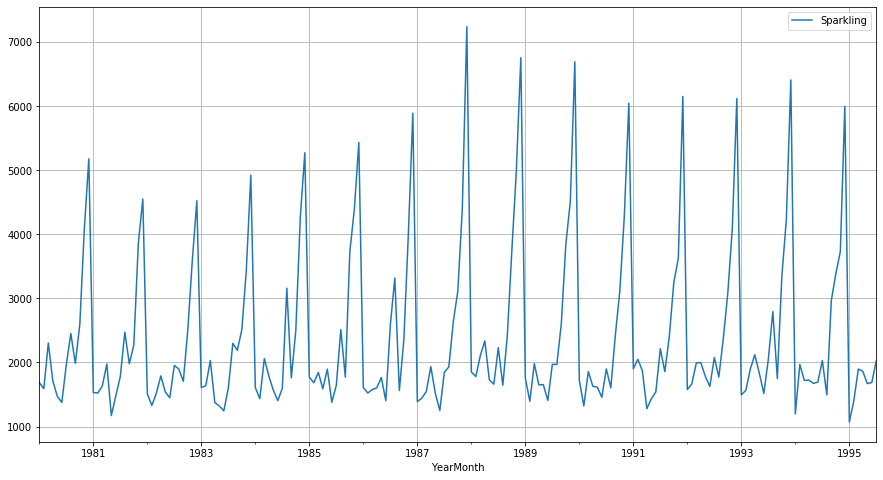

In [9]:
data_sparkling.plot(grid=True);

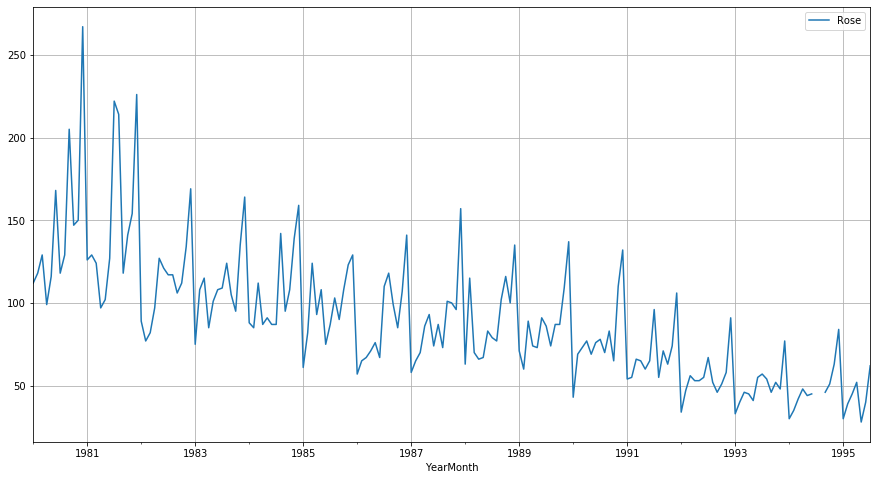

In [10]:
data_rose.plot(grid=True);

# Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition


In [11]:
data_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [12]:
data_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


We see out of 187 date entries, we have sale values for only 185. We need to identify and handle(interpolate) 2 missing values

In [13]:
data_rose.isnull().sum()

Rose    2
dtype: int64

In [14]:
is_NaN = data_rose.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data_rose[row_has_NaN]
print(rows_with_NaN)

            Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN


In [15]:
data_rose_treat_null = data_rose.copy()
data_rose_treat_null.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [16]:
data_rose_treat_null['linear'] = data_rose_treat_null['Rose'].interpolate(method='linear')
data_rose_treat_null['time'] = data_rose_treat_null['Rose'].interpolate(method='time')
data_rose_treat_null['nearest'] = data_rose_treat_null['Rose'].interpolate(method='nearest')
data_rose_treat_null['quadratic'] = data_rose_treat_null['Rose'].interpolate(method='quadratic')
data_rose_treat_null['poly2'] = data_rose_treat_null['Rose'].interpolate(method='polynomial', order = 2)
data_rose_treat_null['spline'] = data_rose_treat_null['Rose'].interpolate(method='spline', order = 2)

In [17]:
data_rose_treat_null.head()

Rose  linear   time  nearest  quadratic  poly2  spline
YearMonth                                                          
1980-01-01  112.0   112.0  112.0    112.0      112.0  112.0   112.0
1980-02-01  118.0   118.0  118.0    118.0      118.0  118.0   118.0
1980-03-01  129.0   129.0  129.0    129.0      129.0  129.0   129.0
1980-04-01   99.0    99.0   99.0     99.0       99.0   99.0    99.0
1980-05-01  116.0   116.0  116.0    116.0      116.0  116.0   116.0

In [18]:
data_rose_treat_null.isnull().sum()

Rose         2
linear       0
time         0
nearest      0
quadratic    0
poly2        0
spline       0
dtype: int64

In [19]:
data_rose_treat_null.dropna(inplace=True)

In [20]:
import statsmodels.tools.eval_measures as em

In [21]:
for i in data_rose_treat_null.columns:
  print(i , ':' , '%.12f'%em.rmse(data_rose_treat_null[i] , data_rose_treat_null['Rose']))

Rose : 0.000000000000
linear : 0.000000000000
time : 0.000000000000
nearest : 0.000000000000
quadratic : 0.000000000000
poly2 : 0.000000000000
spline : 0.000000000000


All the different interpolation methods used, have the similar RMSE. Hence, we will go with linear method to interpolate the 2 missing values which are continuous time stamp

In [22]:
data_rose['Rose'].interpolate(method='linear', inplace = True)

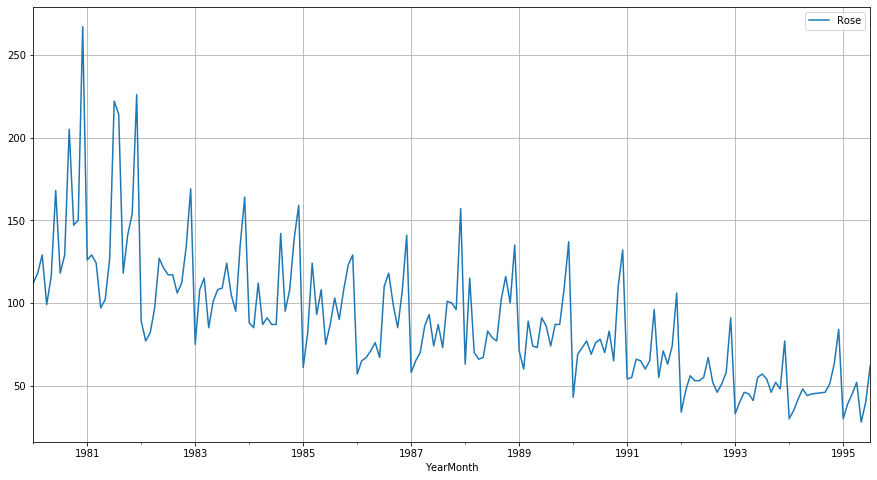

In [23]:
data_rose.plot(grid=True);

## Boxplot for different years.

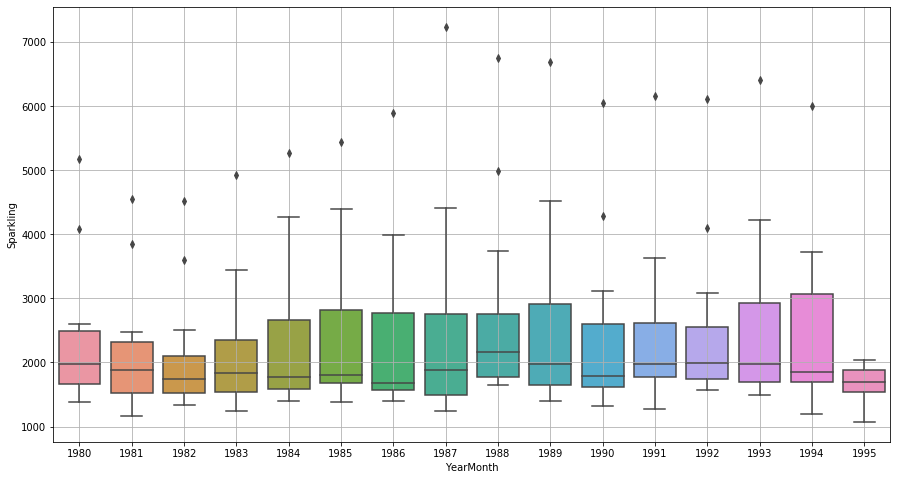

In [24]:
sns.boxplot(x=data_sparkling.index.year,y='Sparkling',data=data_sparkling)
plt.grid();

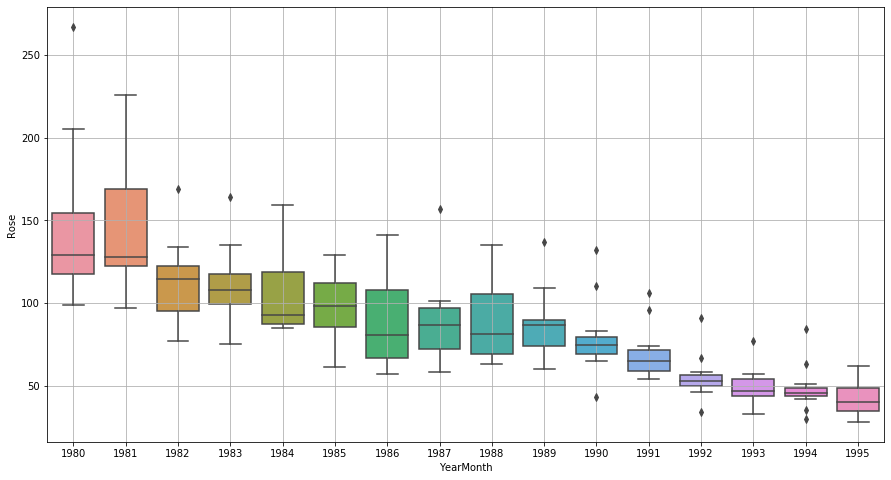

In [25]:
sns.boxplot(x=data_rose.index.year,y='Rose',data=data_rose)
plt.grid();

## Boxplot for different months.

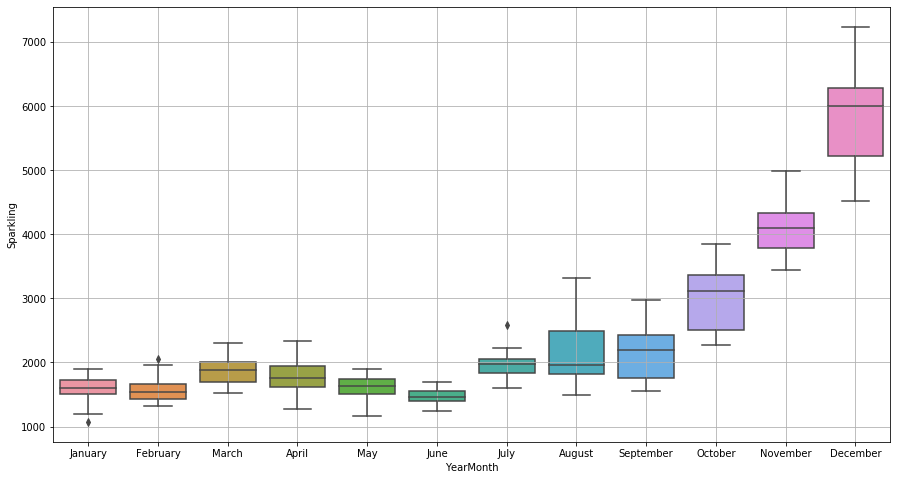

In [26]:
sns.boxplot(x=data_sparkling.index.month_name(),y='Sparkling',data=data_sparkling)
plt.grid();

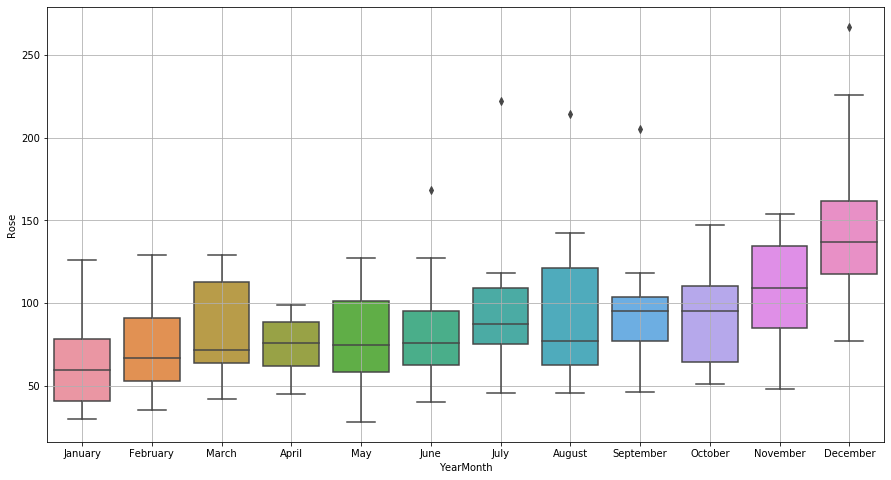

In [27]:
sns.boxplot(x=data_rose.index.month_name(),y='Rose',data=data_rose)
plt.grid();

In [28]:
data_sparkling

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

In [29]:
len(data_sparkling)

187

In [30]:
data_sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [31]:
print('We have around',187/12,'years of data starting from Jan-1980 to July-1995')

We have around 15.583333333333334 years of data starting from Jan-1980 to July-1995


In [32]:
data_rose

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]

In [33]:
len(data_rose)

187

In [34]:
data_rose.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [35]:
print('We have around',187/12,'years of data starting from Jan-1980 to July-1995')

We have around 15.583333333333334 years of data starting from Jan-1980 to July-1995


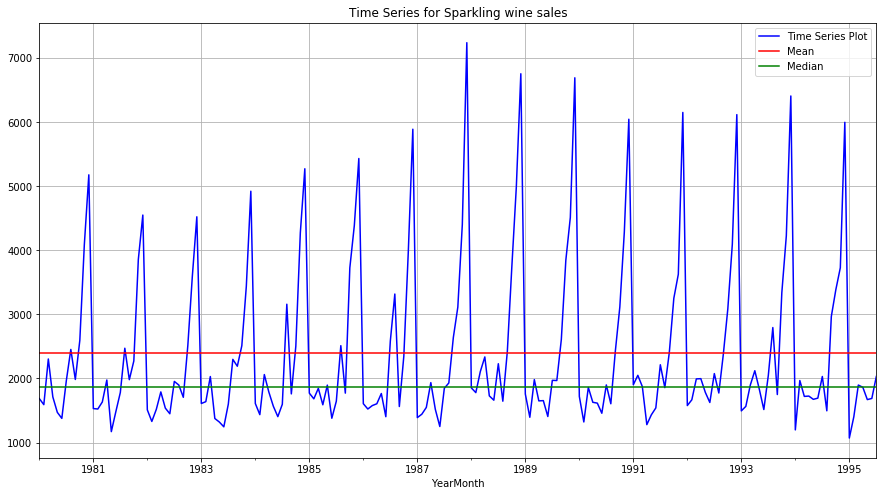

In [36]:
data_sparkling.plot(color='Blue')
plt.axhline(data_sparkling['Sparkling'].mean(),color='Red')
plt.axhline(data_sparkling['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median'])
plt.title('Time Series for Sparkling wine sales')
plt.show()

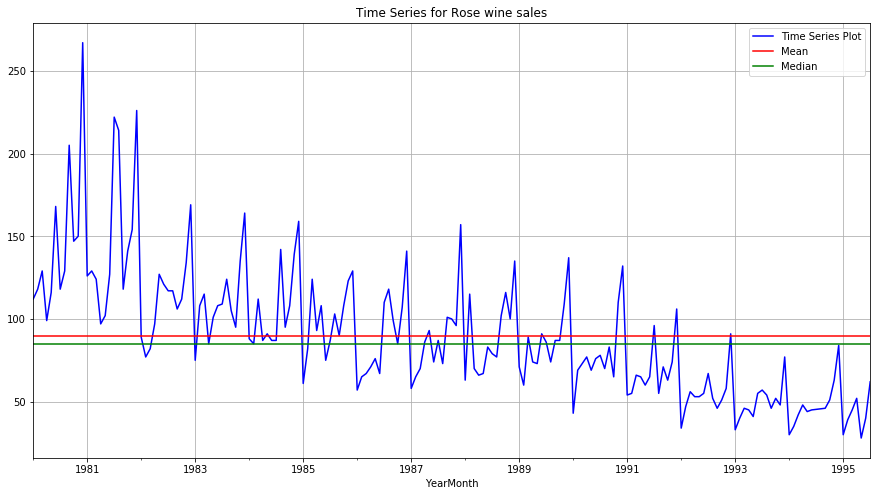

In [37]:
data_rose.plot(color='Blue')
plt.axhline(data_rose['Rose'].mean(),color='Red')
plt.axhline(data_rose['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median'])
plt.title('Time Series for Rose wine sales')
plt.show()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

Sparkling Additive Decomposition

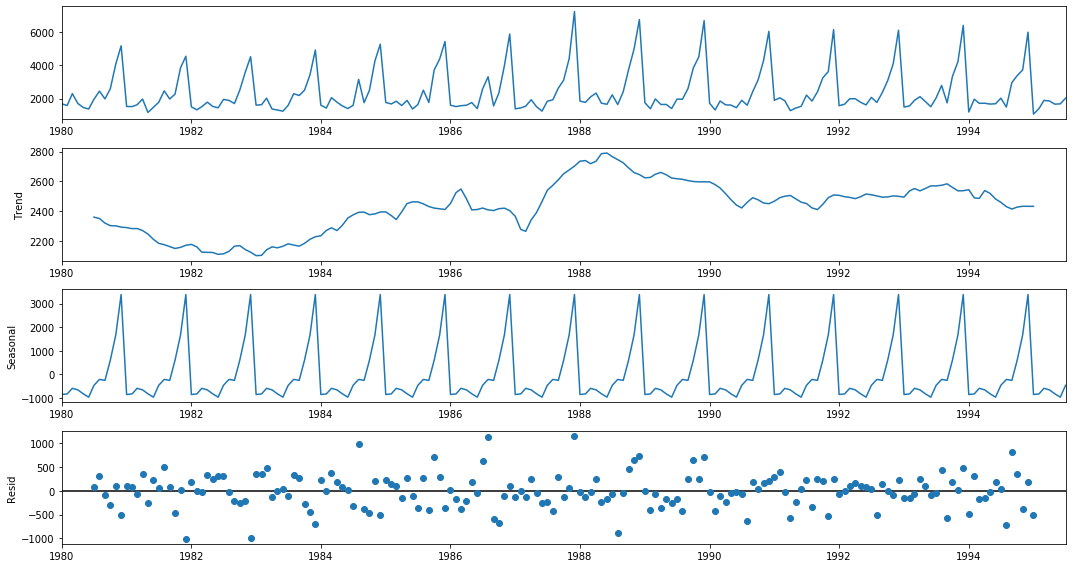

In [39]:
## Additive Decomposition

decomposition_sparkling_add = seasonal_decompose(data_sparkling,model='additive')
decomposition_sparkling_add.plot();

In [40]:
sparkling_trend_add = decomposition_sparkling_add.trend
sparkling_seasonal_add = decomposition_sparkling_add.seasonal
sparkling_residual_add = decomposition_sparkling_add.resid

In [41]:
print(sparkling_trend_add.head(12))
print(sparkling_seasonal_add.head(12))
print(sparkling_residual_add.head(12))

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64
YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64
YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290
1980-11-01    109.891154
1980-12-01  

Sparkling Multiplicative Decomposition

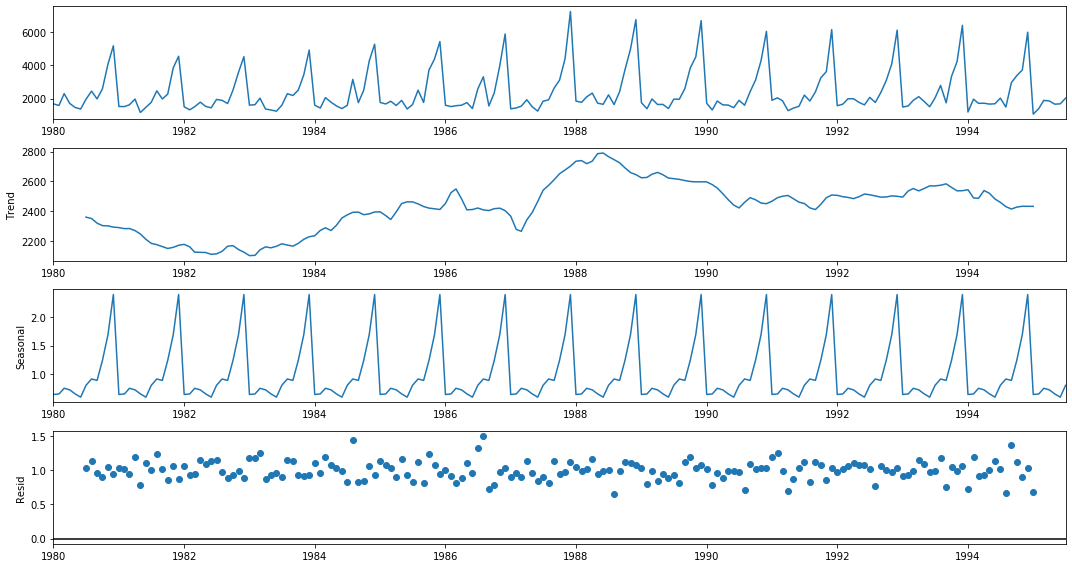

In [42]:
## Multiplicative Decomposition

decomposition_sparkling_mul = seasonal_decompose(data_sparkling,model='multiplicative')
decomposition_sparkling_mul.plot();

In [43]:
sparkling_trend_mul = decomposition_sparkling_mul.trend
sparkling_seasonal_mul = decomposition_sparkling_mul.seasonal
sparkling_residual_mul = decomposition_sparkling_mul.resid

In [44]:
print(sparkling_trend_mul.head(12))
print(sparkling_seasonal_mul.head(12))
print(sparkling_residual_mul.head(12))

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64
YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64
YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resid, dtype: float64


Rose Additive Decomposition

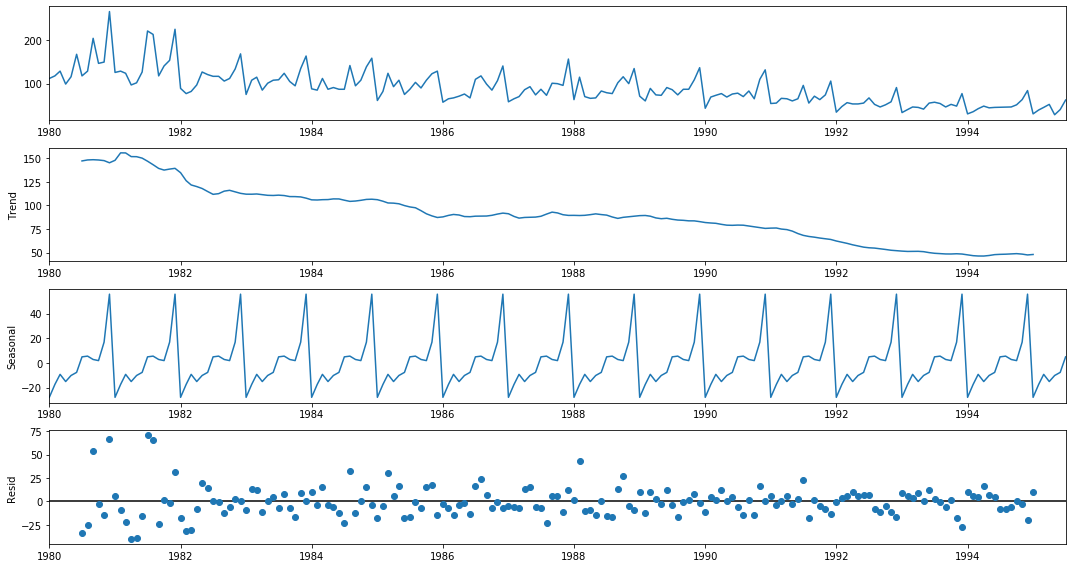

In [45]:
## Additive Decomposition

decomposition_rose_add = seasonal_decompose(data_rose,model='additive')
decomposition_rose_add.plot();

In [46]:
rose_trend_add = decomposition_rose_add.trend
rose_seasonal_add = decomposition_rose_add.seasonal
rose_residual_add = decomposition_rose_add.resid

In [47]:
print(rose_trend_add.head(12))
print(rose_seasonal_add.head(12))
print(rose_residual_add.head(12))

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64
YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64
YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.161425
Name: resid, dtype: float64


Rose Multiplicative Decomposition

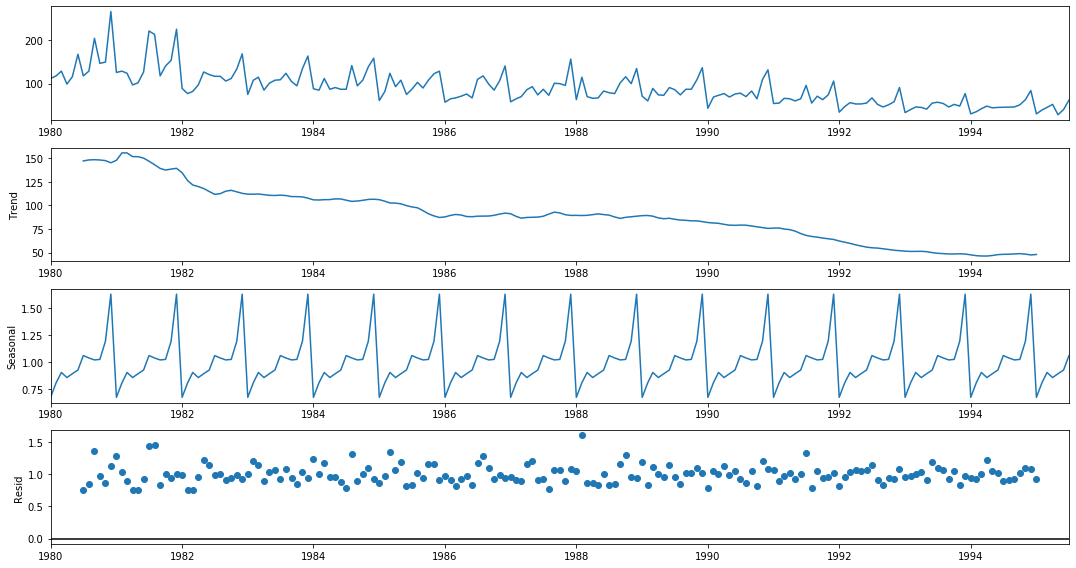

In [48]:
## Multiplicative Decomposition

decomposition_rose_mul = seasonal_decompose(data_rose,model='multiplicative')
decomposition_rose_mul.plot();

In [49]:
rose_trend_mul = decomposition_rose_mul.trend
rose_seasonal_mul = decomposition_rose_mul.seasonal
rose_residual_mul = decomposition_rose_mul.resid

In [50]:
print(rose_trend_mul.head(12))
print(rose_seasonal_mul.head(12))
print(rose_residual_mul.head(12))

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64
YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64
YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: float64


# Q3.  Split the data into training and test. The test data should start in 1991


In [51]:
sparkling_train = data_sparkling[data_sparkling.index<'1991']
sparkling_test = data_sparkling[data_sparkling.index>'1991']

In [52]:
rose_train = data_rose[data_rose.index<'1991']
rose_test = data_rose[data_rose.index>'1991']

In [53]:
from IPython.display import display

Sparkling Training Data

In [54]:
print('First 5 rows of the Sparkling Training Data')
display(sparkling_train.head())
print('Last 5 rows of the Sparkling Training Data')
display(sparkling_train.tail())

First 5 rows of the Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last 5 rows of the Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

Sparkling Testing Data

In [55]:
print('First 5 rows of the Sparkling Test Data')
display(sparkling_test.head())
print('Last 5 rows of the Sparkling Test Data')
display(sparkling_test.tail())

First 5 rows of the Sparkling Test Data


Sparkling
YearMonth            
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432
1991-06-01       1540

Last 5 rows of the Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

Rose Training Data

In [56]:
print('First 5 rows of the Rose Training Data')
display(rose_train.head())
print('Last 5 rows of the Rose Training Data')
display(rose_train.tail())

First 5 rows of the Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last 5 rows of the Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

Rose Testing Data

In [57]:
print('First 5 rows of the Rose Test Data')
display(rose_test.head())
print('Last 5 rows of the Rose Test Data')
display(rose_test.tail())

First 5 rows of the Rose Test Data


Rose
YearMonth       
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0
1991-06-01  65.0

Last 5 rows of the Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

# Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
# Please do try to build as many models as possible and as many iterations of models as possible with different parameters.


# Sparkling wine monthly sales - Model building

# Model 1 - Linear Regression for Sparkling wine sales

In [58]:
# Importing the Linear Regression function from sklearn

from sklearn.linear_model import LinearRegression

In [59]:
# Defining a Linear Regression object class

lr1 = LinearRegression()

In [60]:
sparkling_train_time = [ i+1 for i in range(len(sparkling_train)) ]
sparkling_train_time

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132]

In [61]:
sparkling_test_time = [ i+133 for i in range(len(sparkling_test)) ]
sparkling_test_time

[133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186]

In [62]:
sparkling_lr_train = sparkling_train.copy()

sparkling_lr_test = sparkling_test.copy()

In [63]:
sparkling_lr_train['lrtime'] = sparkling_train_time

In [64]:
sparkling_lr_test['lrtime'] = sparkling_test_time

In [65]:
sparkling_lr_train

Sparkling  lrtime
YearMonth                    
1980-01-01       1686       1
1980-02-01       1591       2
1980-03-01       2304       3
1980-04-01       1712       4
1980-05-01       1471       5
...               ...     ...
1990-08-01       1605     128
1990-09-01       2424     129
1990-10-01       3116     130
1990-11-01       4286     131
1990-12-01       6047     132

[132 rows x 2 columns]

In [66]:
sparkling_lr_test

Sparkling  lrtime
YearMonth                    
1991-02-01       2049     133
1991-03-01       1874     134
1991-04-01       1279     135
1991-05-01       1432     136
1991-06-01       1540     137
1991-07-01       2214     138
1991-08-01       1857     139
1991-09-01       2408     140
1991-10-01       3252     141
1991-11-01       3627     142
1991-12-01       6153     143
1992-01-01       1577     144
1992-02-01       1667     145
1992-03-01       1993     146
1992-04-01       1997     147
1992-05-01       1783     148
1992-06-01       1625     149
1992-07-01       2076     150
1992-08-01       1773     151
1992-09-01       2377     152
1992-10-01       3088     153
1992-11-01       4096     154
1992-12-01       6119     155
1993-01-01       1494     156
1993-02-01       1564     157
1993-03-01       1898     158
1993-04-01       2121     159
1993-05-01       1831     160
1993-06-01       1515     161
1993-07-01       2048     162
1993-08-01       2795     163
1993-09-01       1749     164
1993-10-01       3339     165
1993-11-01       4227     166
1993-12-01       6410     167
1994-01-01       1197     168
1994-02-01       1968     169
1994-03-01       1720     170
1994-04-01       1725     171
1994-05-01       1674     172
1994-06-01       1693     173
1994-07-01       2031     174
1994-08-01       1495     175
1994-09-01       2968     176
1994-10-01       3385     177
1994-11-01       3729     178
1994-12-01       5999     179
1995-01-01       1070     180
1995-02-01       1402     181
1995-03-01       1897     182
1995-04-01       1862     183
1995-05-01       1670     184
1995-06-01       1688     185
1995-07-01       2031     186

In [67]:
# Fitting an object which has been instantiated by the training data.

lr1.fit(sparkling_lr_train[['lrtime']] , sparkling_lr_train['Sparkling'])

LinearRegression()

In [68]:
## Prediction on the train data

sparkling_lr_train_predict = lr1.predict(sparkling_lr_train[['lrtime']])

In [69]:
## Prediction on the test data

sparkling_lr_test_predict = lr1.predict(sparkling_lr_test[['lrtime']])

In [70]:
## Prediction on the train and test data

sparkling_lr_train['pred'] = sparkling_lr_train_predict

sparkling_lr_test['pred'] = sparkling_lr_test_predict

In [71]:
sparkling_lr_train

Sparkling  lrtime         pred
YearMonth                                 
1980-01-01       1686       1  2021.741171
1980-02-01       1591       2  2027.573830
1980-03-01       2304       3  2033.406488
1980-04-01       1712       4  2039.239147
1980-05-01       1471       5  2045.071805
...               ...     ...          ...
1990-08-01       1605     128  2762.488801
1990-09-01       2424     129  2768.321459
1990-10-01       3116     130  2774.154118
1990-11-01       4286     131  2779.986776
1990-12-01       6047     132  2785.819435

[132 rows x 3 columns]

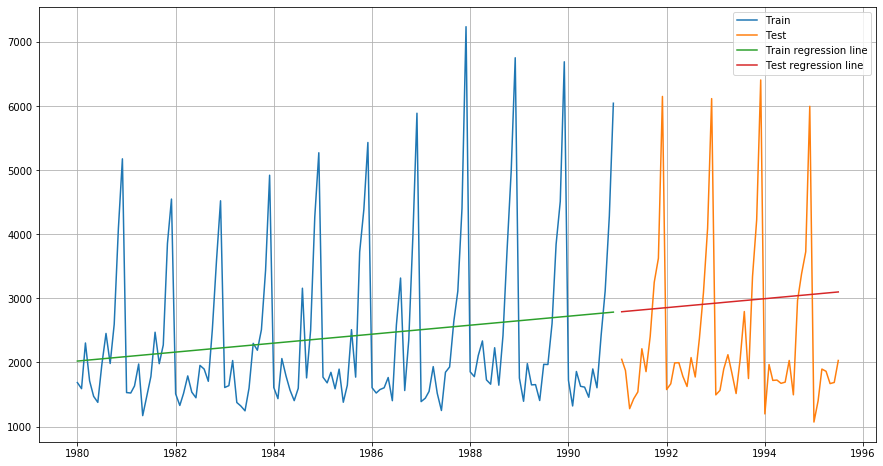

In [72]:
## Plotting on both the Training and Test using linear regression

plt.plot(sparkling_lr_train['Sparkling'], label='Train')
plt.plot(sparkling_lr_test['Sparkling'], label='Test')

plt.plot(sparkling_lr_train['pred'], label='Train regression line')
plt.plot(sparkling_lr_test['pred'], label='Test regression line')


plt.legend(loc='best')
plt.grid();

In [73]:
# Evaluation

from sklearn import metrics

In [74]:
# RMSE Calculation
sparkling_lr_train_rmse = metrics.mean_squared_error(sparkling_lr_train['Sparkling'],sparkling_lr_train['pred'],squared=False)
sparkling_lr_test_rmse = metrics.mean_squared_error(sparkling_lr_test['Sparkling'],sparkling_lr_test['pred'],squared=False)
print(sparkling_lr_train_rmse)
print(sparkling_lr_test_rmse)

1279.32234587938
1394.4411815147946


In [75]:
resultsDf = pd.DataFrame({'Train RMSE': [sparkling_lr_train_rmse],'Test RMSE': [sparkling_lr_test_rmse]},index=['Linear Regression'])
resultsDf

Train RMSE    Test RMSE
Linear Regression  1279.322346  1394.441182

# Model 2 - Moving Average for Sparkling wine sales


In [76]:
# Model 2 - Moving Average


MA_sparkling = pd.DataFrame(data_sparkling).copy()

In [77]:
MA_sparkling['MA3'] = MA_sparkling.rolling(3).mean()

In [78]:
MA_sparkling

Sparkling          MA3
YearMonth                         
1980-01-01       1686          NaN
1980-02-01       1591          NaN
1980-03-01       2304  1860.333333
1980-04-01       1712  1869.000000
1980-05-01       1471  1829.000000
...               ...          ...
1995-03-01       1897  1456.333333
1995-04-01       1862  1720.333333
1995-05-01       1670  1809.666667
1995-06-01       1688  1740.000000
1995-07-01       2031  1796.333333

[187 rows x 2 columns]

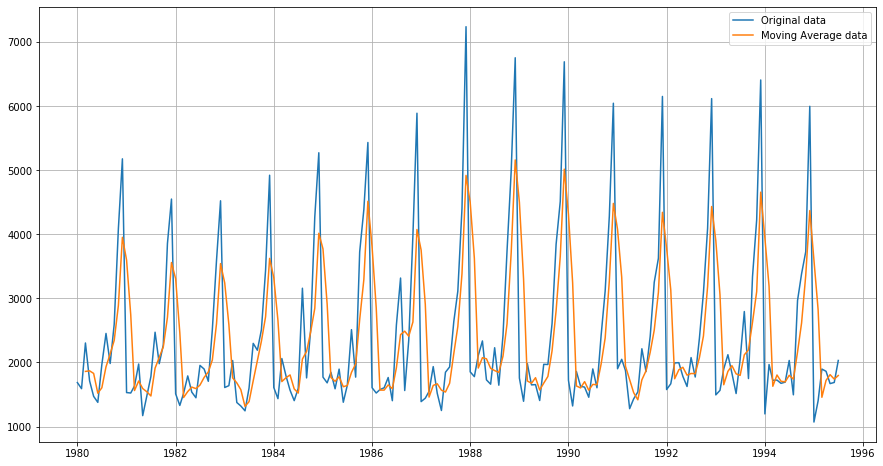

In [79]:
## Plotting on both the original and rolling using moving average

plt.plot(MA_sparkling['Sparkling'], label='Original data')
plt.plot(MA_sparkling['MA3'], label='Moving Average data')

plt.legend(loc='best')
plt.grid();

In [80]:
MA_sparkling.dropna(inplace=True)

In [81]:
metrics.mean_squared_error(MA_sparkling['Sparkling'],MA_sparkling['MA3'],squared=False)

984.7459165287867

In [82]:
sparkling_MA_rmse = metrics.mean_squared_error(MA_sparkling['Sparkling'],MA_sparkling['MA3'],squared=False)

In [83]:
resultsDf_temp = pd.DataFrame({'Train RMSE': [sparkling_MA_rmse],'Test RMSE': [sparkling_MA_rmse]},index=['Moving Average with 3'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression      1279.322346  1394.441182
Moving Average with 3   984.745917   984.745917

# Model 3 - SES(optimized parameter) for Sparkling wine sales

In [84]:
# Model 3 - SES 


from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing     # SES , DES , TES

In [85]:
import statsmodels
statsmodels.__version__

'0.11.0'

In [86]:
sparkling_SES_train = pd.DataFrame(sparkling_train).copy()
sparkling_SES_test = pd.DataFrame(sparkling_test).copy()

In [87]:
sparkling_model_SES = SimpleExpSmoothing(sparkling_SES_train['Sparkling'])

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [88]:
sparkling_model_SES_autofit = sparkling_model_SES.fit(optimized = True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [89]:
sparkling_model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
sparkling_SES_train['predict']  = sparkling_model_SES_autofit.fittedvalues

In [91]:
sparkling_SES_train.head()

Sparkling      predict
YearMonth                         
1980-01-01       1686  2403.785622
1980-02-01       1591  2403.785622
1980-03-01       2304  2403.785622
1980-04-01       1712  2403.785622
1980-05-01       1471  2403.785622

In [92]:
# Forecast for test data


sparkling_SES_test['pred'] = sparkling_model_SES_autofit.forecast(steps = len(sparkling_SES_test)+1)

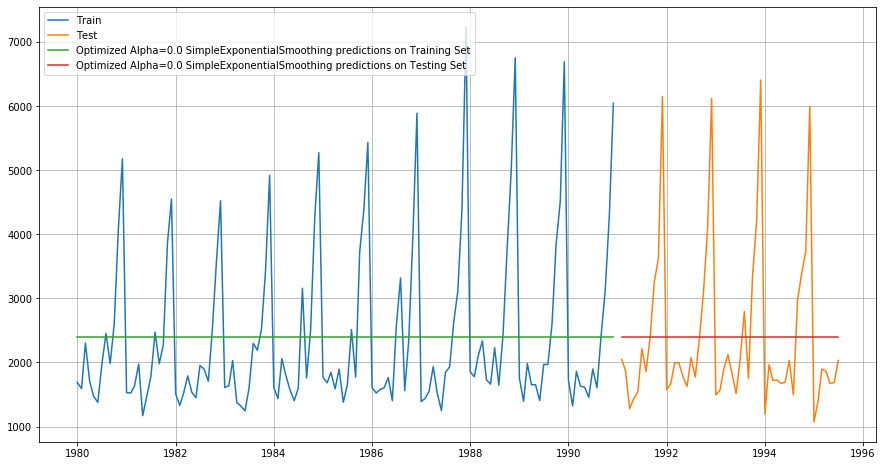

In [93]:
## Plotting on both the Training and Test using SES

plt.plot(sparkling_SES_train['Sparkling'], label='Train')
plt.plot(sparkling_SES_test['Sparkling'], label='Test')

plt.plot(sparkling_SES_train['predict'], label='Optimized Alpha=0.0 SimpleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_SES_test['pred'], label='Optimized Alpha=0.0 SimpleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();

In [94]:
# Evaluation (Using RMSE)

sparkling_SES_train_rmse = metrics.mean_squared_error(sparkling_SES_train['Sparkling'],sparkling_SES_train['predict'],squared=False)
sparkling_SES_test_rmse = metrics.mean_squared_error(sparkling_SES_test['Sparkling'],sparkling_SES_test['pred'],squared=False)

print(metrics.mean_squared_error(sparkling_SES_train['Sparkling'],sparkling_SES_train['predict'],squared=False))
print(metrics.mean_squared_error(sparkling_SES_test['Sparkling'],sparkling_SES_test['pred'],squared=False))

1298.483627953991
1285.020984405768


In [95]:
resultsDf_temp = pd.DataFrame({'Train RMSE': [sparkling_SES_train_rmse],'Test RMSE': [sparkling_SES_test_rmse]},index=['Optimized Alpha=0.0 SES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression        1279.322346  1394.441182
Moving Average with 3     984.745917   984.745917
Optimized Alpha=0.0 SES  1298.483628  1285.020984

# Model 3 - SES(BrutForce parameter) for Sparkling wine sales

In [96]:
smoothing_level_param = [x * 0.10 for x in range(0,10)]
smoothing_level_param

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [97]:
SES_BF_RMSE = pd.DataFrame(columns = ['Level' , 'RMSE'])

SES_BF_RMSE

Empty DataFrame
Columns: [Level, RMSE]
Index: []

In [98]:
for x in smoothing_level_param:
    sparkling_model_SES_brutforce = sparkling_model_SES.fit(smoothing_level = x)
    rmse = metrics.mean_squared_error(sparkling_SES_train['Sparkling'],sparkling_model_SES_brutforce.fittedvalues,squared=False)
    SES_BF_RMSE = SES_BF_RMSE.append({'Level' : x , 'RMSE' : '%.12f'%rmse} , ignore_index= True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anacon

In [99]:
SES_BF_RMSE.sort_values(by='RMSE', ascending = True)

Level               RMSE
0    0.0  1298.483627995608
1    0.1  1331.786996381026
6    0.6  1338.801428272255
7    0.7  1338.843297922837
5    0.5  1343.994118902847
8    0.8  1344.462034855192
4    0.4  1352.562367491342
2    0.2  1355.645333711366
9    0.9  1355.723493155530
3    0.3  1359.422162439647

In [100]:
sparkling_model_SES_brutforce = sparkling_model_SES.fit(smoothing_level = 0.0)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [101]:
sparkling_model_SES_brutforce.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7919805062324,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
sparkling_SES_train['BFpredict']  = sparkling_model_SES_brutforce.fittedvalues

In [103]:
sparkling_SES_train.head()

Sparkling      predict    BFpredict
YearMonth                                      
1980-01-01       1686  2403.785622  2403.791981
1980-02-01       1591  2403.785622  2403.791981
1980-03-01       2304  2403.785622  2403.791981
1980-04-01       1712  2403.785622  2403.791981
1980-05-01       1471  2403.785622  2403.791981

In [104]:
# Forecast for test data


sparkling_SES_test['BFpred'] = sparkling_model_SES_autofit.forecast(steps = len(sparkling_SES_test)+1)

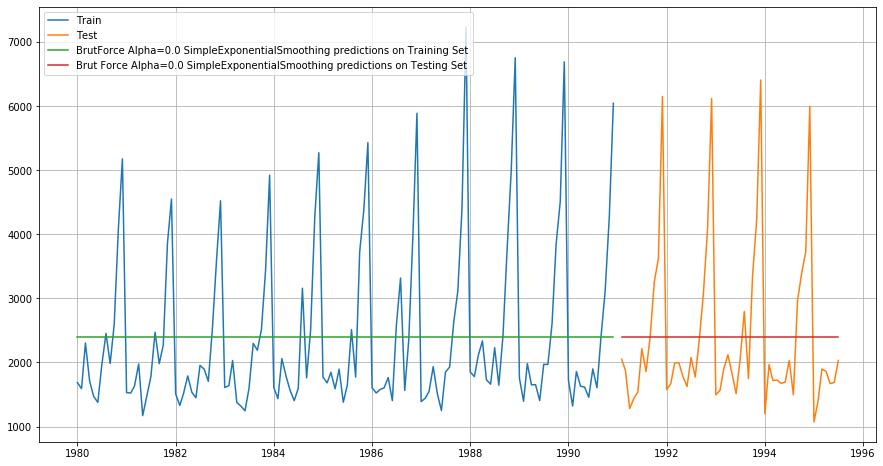

In [105]:
## Plotting on both the Training and Test using SES Brut Force

plt.plot(sparkling_SES_train['Sparkling'], label='Train')
plt.plot(sparkling_SES_test['Sparkling'], label='Test')

plt.plot(sparkling_SES_train['BFpredict'], label='BrutForce Alpha=0.0 SimpleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_SES_test['BFpred'], label='Brut Force Alpha=0.0 SimpleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();


In [106]:
# Evaluation (Using RMSE)

sparkling_SES_train_bf_rmse = metrics.mean_squared_error(sparkling_SES_train['Sparkling'],sparkling_SES_train['BFpredict'],squared=False)
sparkling_SES_test_bf_rmse = metrics.mean_squared_error(sparkling_SES_test['Sparkling'],sparkling_SES_test['BFpred'],squared=False)

print(metrics.mean_squared_error(sparkling_SES_train['Sparkling'],sparkling_SES_train['BFpredict'],squared=False))
print(metrics.mean_squared_error(sparkling_SES_test['Sparkling'],sparkling_SES_test['BFpred'],squared=False))

1298.4836279956075
1285.020984405768


In [107]:
resultsDf_temp = pd.DataFrame({'Train RMSE': [sparkling_SES_train_bf_rmse],'Test RMSE': [sparkling_SES_test_bf_rmse]},index=['BrutForce Alpha=0.0 SES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression        1279.322346  1394.441182
Moving Average with 3     984.745917   984.745917
Optimized Alpha=0.0 SES  1298.483628  1285.020984
BrutForce Alpha=0.0 SES  1298.483628  1285.020984

# Model 4  - DES Holt's Model for Sparkling wine sales

In [108]:
## Making copies of the training and test set
sparkling_DES_train = pd.DataFrame(sparkling_train).copy()
sparkling_DES_test = pd.DataFrame(sparkling_test).copy()

In [109]:
sparkling_model_DES = Holt(sparkling_DES_train['Sparkling'])

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [110]:
# Fitting the Double Exponential Smoothing model and asking python to choose the optimal parameters
sparkling_model_DES_autofit = sparkling_model_DES.fit(optimized=True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [111]:
sparkling_model_DES_autofit.params

{'smoothing_level': 0.6477924009906908,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083776800016,
 'initial_slope': 27.059653074962753,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [112]:
sparkling_DES_train['predict'] = sparkling_model_SES_autofit.fittedvalues

In [113]:
sparkling_DES_test['predict'] = sparkling_model_DES_autofit.forecast(steps=len(sparkling_DES_test)+1)

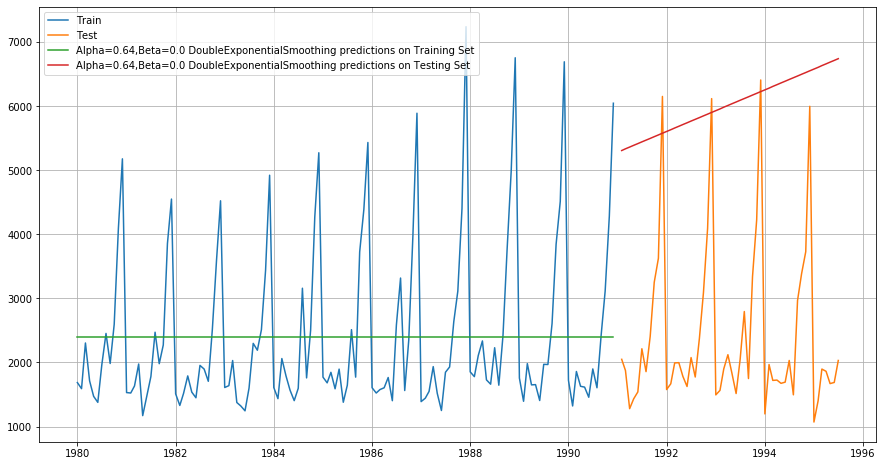

In [114]:
## Plotting on both the Training and Test using Optimized DES

plt.plot(sparkling_DES_train['Sparkling'], label='Train')
plt.plot(sparkling_DES_test['Sparkling'], label='Test')

plt.plot(sparkling_DES_train['predict'], label='Alpha=0.64,Beta=0.0 DoubleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_DES_test['predict'], label='Alpha=0.64,Beta=0.0 DoubleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();

In [115]:
# Evaluation

sparkling_DES_train_bf_rmse = metrics.mean_squared_error(sparkling_DES_train['Sparkling'],sparkling_DES_train['predict'],squared=False)
sparkling_DES_test_bf_rmse = metrics.mean_squared_error(sparkling_DES_test['Sparkling'],sparkling_DES_test['predict'],squared=False)

print(metrics.mean_squared_error(sparkling_DES_train['Sparkling'],sparkling_DES_train['predict'],squared=False))
print(metrics.mean_squared_error(sparkling_DES_test['Sparkling'],sparkling_DES_test['predict'],squared=False))

1298.483627953991
3859.1788622431136


In [116]:
resultsDf_temp = pd.DataFrame({'Train RMSE': [sparkling_DES_train_bf_rmse],'Test RMSE': [sparkling_DES_test_bf_rmse]},index=['Optimized Alpha=0.64,Beta=0.0 DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                  1279.322346  1394.441182
Moving Average with 3               984.745917   984.745917
Optimized Alpha=0.0 SES            1298.483628  1285.020984
BrutForce Alpha=0.0 SES            1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES  1298.483628  3859.178862

# MODEL 5 TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model for Sparkling wine sales

In [117]:
# TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model

sparkling_TES_train = pd.DataFrame(sparkling_train).copy()
sparkling_TES_test = pd.DataFrame(sparkling_test).copy()

In [118]:
sparkling_model_TES = ExponentialSmoothing(sparkling_TES_train['Sparkling'], trend = 'additive' , seasonal='additive' , freq = 'MS', seasonal_periods= 12 )

In [119]:
sparkling_model_TES_autofit = sparkling_model_TES.fit(optimized = True)
sparkling_model_TES_autofit.params

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


{'smoothing_level': 0.08621976457712728,
 'smoothing_slope': 1.3722820308989836e-08,
 'smoothing_seasonal': 0.4763668704627969,
 'damping_slope': nan,
 'initial_level': 1684.7567371537205,
 'initial_slope': 0.00663980720702693,
 'initial_seasons': array([  39.19865194,  -37.26225944,  465.11612145,  205.83244815,
        -140.69775927, -156.92133674,  338.06682948,  856.76977123,
         403.45669741,  971.24810067, 2401.69439277, 3426.88784686]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [120]:
sparkling_TES_train['predict'] = sparkling_model_TES_autofit.fittedvalues
sparkling_TES_train.head()

Sparkling      predict
YearMonth                         
1980-01-01       1686  1723.962029
1980-02-01       1591  1644.234680
1980-03-01       2304  2142.029819
1980-04-01       1712  1896.717817
1980-05-01       1471  1534.267922

In [121]:
sparkling_TES_test['predict'] = sparkling_model_TES_autofit.forecast(steps=len(sparkling_TES_test)+1)
sparkling_TES_test.head()

Sparkling      predict
YearMonth                         
1991-02-01       2049  1241.380627
1991-03-01       1874  1726.781065
1991-04-01       1279  1584.320418
1991-05-01       1432  1494.023217
1991-06-01       1540  1311.482575

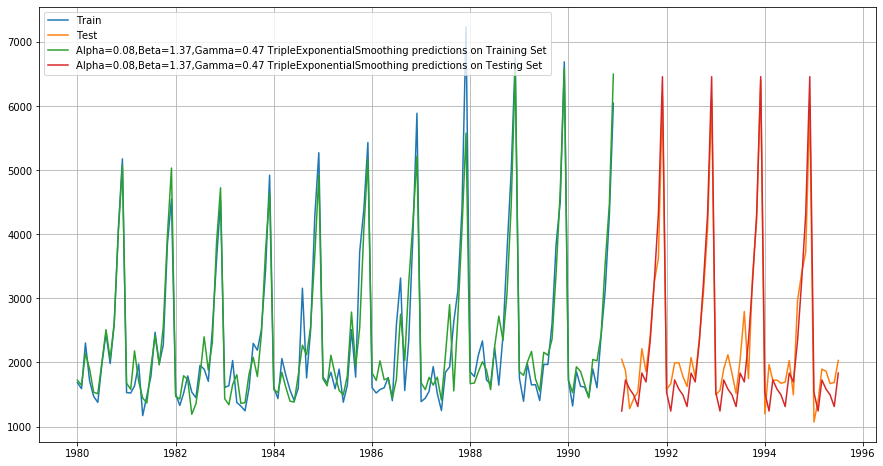

In [122]:
## Plotting on both the Training and Test using Optimized TES

plt.plot(sparkling_TES_train['Sparkling'], label='Train')
plt.plot(sparkling_TES_test['Sparkling'], label='Test')

plt.plot(sparkling_TES_train['predict'], label='Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_TES_test['predict'], label='Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();

In [123]:
# Evaluation

sparkling_TES_train_bf_rmse = metrics.mean_squared_error(sparkling_TES_train['Sparkling'],sparkling_TES_train['predict'],squared=False)
sparkling_TES_test_bf_rmse = metrics.mean_squared_error(sparkling_TES_test['Sparkling'],sparkling_TES_test['predict'],squared=False)

print(metrics.mean_squared_error(sparkling_TES_train['Sparkling'],sparkling_TES_train['predict'],squared=False))
print(metrics.mean_squared_error(sparkling_TES_test['Sparkling'],sparkling_TES_test['predict'],squared=False))

371.2644333615326
362.60463392793616


In [124]:
resultsDf_temp = pd.DataFrame({'Train RMSE': [sparkling_TES_train_bf_rmse],'Test RMSE': [sparkling_TES_test_bf_rmse]},index=['Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634

# MODEL 5 - BrutForce TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model for Sparkling wine sales

In [125]:
## First we will define an empty dataframe to store our values from the loop

sparkling_bf_resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE': [],'Test RMSE': [] , 'Train-Test balance':[]})
sparkling_bf_resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Train-Test balance]
Index: []

In [126]:
# Declaring an object which has been instantiated by the training data. We are setting the seasonality 
# to be multiplicative

sparkling_bf_model_TES = ExponentialSmoothing(sparkling_TES_train['Sparkling'],trend='additive',seasonal='additive',freq='MS')

## 'estimated' is the default entry for the parameter method in the above function. So, the students might choose to not
## pass any other parameter other than the training data

In [127]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from the loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from the loop
        for k in np.arange(0.1,1.1,0.1): #Defining the gamma values from the loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit 
# the Triple Exponential model by varying different alpha and beta parameters. 


            sparkling_bf_model_TES_alpha_i_j_k = sparkling_bf_model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            sparkling_TES_train['BFpredict',i,j,k] = sparkling_bf_model_TES_alpha_i_j_k.fittedvalues
            sparkling_TES_test['BFpredict',i,j,k] = sparkling_bf_model_TES_alpha_i_j_k.forecast(steps=len(sparkling_TES_test)+1)
        
        
            sparkling_bf_rmse_model_train = metrics.mean_squared_error(sparkling_TES_train['Sparkling'],sparkling_TES_train['BFpredict',i,j,k],squared=False)
            sparkling_bf_rmse_model_test = metrics.mean_squared_error(sparkling_TES_test['Sparkling'],sparkling_TES_test['BFpredict',i,j,k],squared=False)
            sparkling_bf_rmse_model_bal = abs(sparkling_bf_rmse_model_train - sparkling_bf_rmse_model_test)
            sparkling_bf_resultsDf_TES = sparkling_bf_resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':sparkling_bf_rmse_model_train,
                                                  'Test RMSE':sparkling_bf_rmse_model_test, 
                                                  'Train-Test balance' :sparkling_bf_rmse_model_bal},                                                                         
                                                                           ignore_index=True)

In [128]:
sparkling_bf_resultsDf_TES

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE  \
0             0.1          0.1           0.1  4.250948e+02  5.237604e+02   
1             0.1          0.1           0.2  4.015222e+02  6.438660e+02   
2             0.1          0.1           0.3  3.873034e+02  7.473389e+02   
3             0.1          0.1           0.4  3.802781e+02  8.128130e+02   
4             0.1          0.1           0.5  3.787107e+02  8.463595e+02   
..            ...          ...           ...           ...           ...   
995           1.0          1.0           0.6  1.120481e+04  9.052229e+05   
996           1.0          1.0           0.7  4.737690e+04  2.502661e+06   
997           1.0          1.0           0.8  1.848687e+05  6.357937e+06   
998           1.0          1.0           0.9  6.268726e+05  2.223019e+07   
999           1.0          1.0           1.0  1.866231e+06  9.053760e+07   

     Train-Test balance  
0          9.866561e+01  
1          2.423438e+02  
2          3.600355e+02  
3          4.325349e+02  
4          4.676488e+02  
..                  ...  
995        8.940181e+05  
996        2.455284e+06  
997        6.173068e+06  
998        2.160332e+07  
999        8.867137e+07  

[1000 rows x 6 columns]

In [129]:
print('Sorting the values with respect to RMSE:')
display(sparkling_bf_resultsDf_TES.sort_values(by=['Train RMSE']).head())

Sorting the values with respect to RMSE:


Alpha Values  Beta Values  Gamma Values  Train RMSE    Test RMSE  \
4            0.1          0.1           0.5  378.710709   846.359494   
3            0.1          0.1           0.4  380.278116   812.812970   
5            0.1          0.1           0.6  381.392565   859.326798   
14           0.1          0.2           0.5  384.620014  1267.708809   
13           0.1          0.2           0.4  385.591607  1210.174773   

    Train-Test balance  
4           467.648784  
3           432.534854  
5           477.934234  
14          883.088795  
13          824.583166

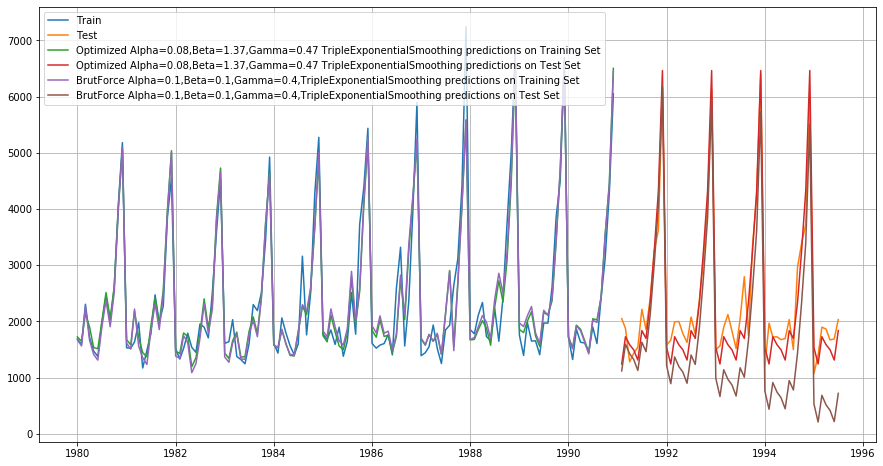

In [130]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination TES

plt.plot(sparkling_TES_train['Sparkling'], label='Train')
plt.plot(sparkling_TES_test['Sparkling'], label='Test')

plt.plot(sparkling_TES_train['predict'], label='Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_TES_test['predict'], label='Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing predictions on Test Set')


## Alpha=0.1,Beta=0.2,Gamma=0.2 (model which has the minimum RMSE on the Brut Force test data)
plt.plot(sparkling_TES_train['BFpredict', 0.1, 0.1, 0.5], label='BrutForce Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_TES_test['BFpredict', 0.1, 0.1, 0.5], label='BrutForce Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [131]:
# Evaluation (Using RMSE)

sparkling_TES_train_rmse = metrics.mean_squared_error(sparkling_TES_train['Sparkling'],sparkling_TES_train['BFpredict', 0.1, 0.1, 0.4],squared=False)
sparkling_TES_test_rmse = metrics.mean_squared_error(sparkling_TES_test['Sparkling'],sparkling_TES_test['BFpredict', 0.1, 0.1, 0.4],squared=False)

print(metrics.mean_squared_error(sparkling_TES_train['Sparkling'],sparkling_TES_train['BFpredict', 0.1, 0.1, 0.4],squared=False))
print(metrics.mean_squared_error(sparkling_TES_test['Sparkling'],sparkling_TES_test['BFpredict', 0.1, 0.1, 0.4],squared=False))

380.2781156313147
812.8129695981971


In [132]:
resultsDf_temp = pd.DataFrame({'Train RMSE':[sparkling_TES_train_rmse],'Test RMSE': [sparkling_TES_test_rmse]},index=['BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES     380.278116   812.812970

# Rose wine monthly sales - Model building

# Model 1 - Liner Regression for Rose wine sales

In [133]:
# Importing the Linear Regression function from sklearn

from sklearn.linear_model import LinearRegression

In [134]:
# Defining a Linear Regression object class

rose_lr = LinearRegression()

In [135]:
rose_train_time = [ i+1 for i in range(len(rose_train)) ]
rose_train_time

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132]

In [136]:
rose_test_time = [ i+132 for i in range(len(rose_test)) ]
rose_test_time

[132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185]

In [137]:
rose_lr_train = rose_train.copy()

rose_lr_test = rose_test.copy()

In [138]:
rose_lr_train['lrtime'] = rose_train_time

In [139]:
rose_lr_test['lrtime'] = rose_test_time

In [140]:
rose_lr_train.head()

Rose  lrtime
YearMonth                
1980-01-01  112.0       1
1980-02-01  118.0       2
1980-03-01  129.0       3
1980-04-01   99.0       4
1980-05-01  116.0       5

In [141]:
rose_lr_test.head()

Rose  lrtime
YearMonth               
1991-02-01  55.0     132
1991-03-01  66.0     133
1991-04-01  65.0     134
1991-05-01  60.0     135
1991-06-01  65.0     136

In [142]:
rose_lr.fit(rose_lr_train[['lrtime']] , rose_lr_train['Rose'])

LinearRegression()

In [143]:
rose_lr_train_predict = rose_lr.predict(rose_lr_train[['lrtime']])

In [144]:
rose_lr_test_predict = lr1.predict(rose_lr_test[['lrtime']])

In [145]:
rose_lr_train['pred'] = rose_lr_train_predict

rose_lr_test['pred'] = rose_lr_test_predict

In [146]:
rose_lr_train

Rose  lrtime        pred
YearMonth                            
1980-01-01  112.0       1  137.321144
1980-02-01  118.0       2  136.826766
1980-03-01  129.0       3  136.332388
1980-04-01   99.0       4  135.838010
1980-05-01  116.0       5  135.343632
...           ...     ...         ...
1990-08-01   70.0     128   74.535156
1990-09-01   83.0     129   74.040778
1990-10-01   65.0     130   73.546400
1990-11-01  110.0     131   73.052022
1990-12-01  132.0     132   72.557644

[132 rows x 3 columns]

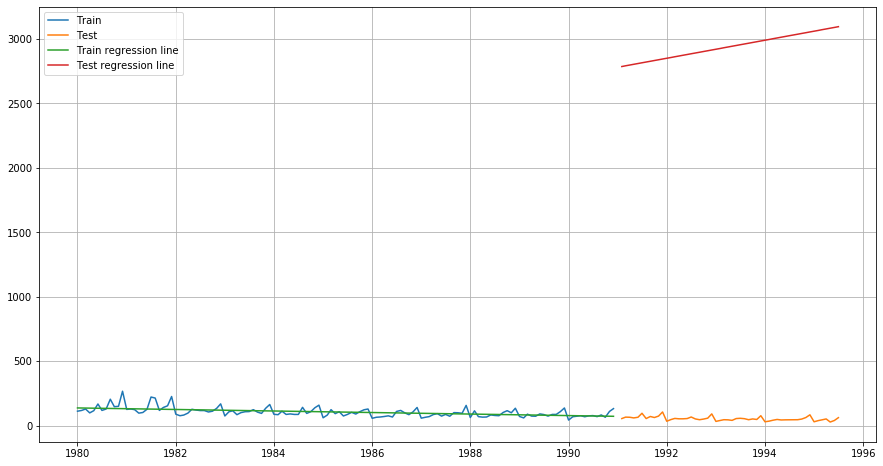

In [147]:
## Plotting on both the Training and Test using linear regression

plt.plot(rose_lr_train['Rose'], label='Train')
plt.plot(rose_lr_test['Rose'], label='Test')

plt.plot(rose_lr_train['pred'], label='Train regression line')
plt.plot(rose_lr_test['pred'], label='Test regression line')


plt.legend(loc='best')
plt.grid();

In [148]:
# Evaluation

from sklearn import metrics

In [149]:
# RMSE Calculation

rose_lr_train_rmse = metrics.mean_squared_error(rose_lr_train['Rose'],rose_lr_train['pred'],squared=False)
rose_lr_test_rmse = metrics.mean_squared_error(rose_lr_test['Rose'],rose_lr_test['pred'],squared=False)
print(rose_lr_train_rmse)
print(rose_lr_test_rmse)

30.718135411331016
2888.2167614259147


In [150]:
rose_resultsDf = pd.DataFrame({'Train RMSE': [rose_lr_train_rmse],'Test RMSE': [rose_lr_test_rmse]},index=['Linear Regression'])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression   30.718135  2888.216761

# Model 2 - Moving Average for Rose wine sales


In [151]:
# Model 2 - Moving Average


MA_rose = pd.DataFrame(data_rose).copy()

In [152]:
MA_rose['MA3'] = MA_rose.rolling(3).mean()

In [153]:
MA_rose

Rose         MA3
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0         NaN
1980-03-01  129.0  119.666667
1980-04-01   99.0  115.333333
1980-05-01  116.0  114.666667
...           ...         ...
1995-03-01   45.0   38.000000
1995-04-01   52.0   45.333333
1995-05-01   28.0   41.666667
1995-06-01   40.0   40.000000
1995-07-01   62.0   43.333333

[187 rows x 2 columns]

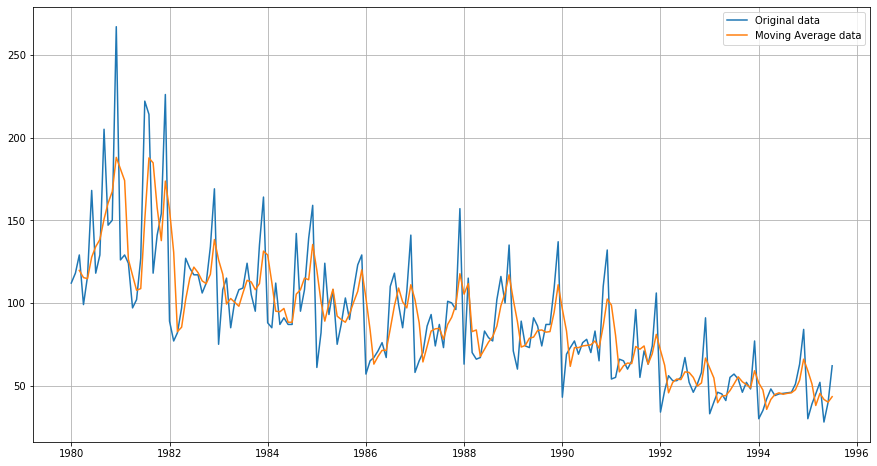

In [154]:
## Plotting on both the original and rolling using moving average

plt.plot(MA_rose['Rose'], label='Original data')
plt.plot(MA_rose['MA3'], label='Moving Average data')

plt.legend(loc='best')
plt.grid();

In [155]:
MA_rose.dropna(inplace=True)

In [156]:
metrics.mean_squared_error(MA_rose['Rose'],MA_rose['MA3'],squared=False)

22.017649970956867

In [157]:
rose_MA_rmse = metrics.mean_squared_error(MA_rose['Rose'],MA_rose['MA3'],squared=False)

In [158]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE': [rose_MA_rmse],'Test RMSE': [rose_MA_rmse]},index=['Moving Average with 3'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression       30.718135  2888.216761
Moving Average with 3   22.017650    22.017650

# Model 3 - SES(optimized parameter) for Rose wine sales

In [159]:
# Model 3 - SES 


from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing     # SES , DES , TES

In [160]:
import statsmodels
statsmodels.__version__

'0.11.0'

In [161]:
rose_SES_train = pd.DataFrame(rose_train).copy()
rose_SES_test = pd.DataFrame(rose_test).copy()

In [162]:
rose_model_SES = SimpleExpSmoothing(rose_SES_train['Rose'])

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [163]:
rose_model_SES_autofit = rose_model_SES.fit(optimized = True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [164]:
rose_model_SES_autofit.params

{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [165]:
rose_SES_train['predict']  = rose_model_SES_autofit.fittedvalues

In [166]:
rose_SES_train.head()

Rose     predict
YearMonth                    
1980-01-01  112.0  134.386956
1980-02-01  118.0  132.176246
1980-03-01  129.0  130.776343
1980-04-01   99.0  130.600930
1980-05-01  116.0  127.480341

In [167]:
# Forecast for test data


rose_SES_test['pred'] = rose_model_SES_autofit.forecast(steps = len(rose_SES_test)+1)

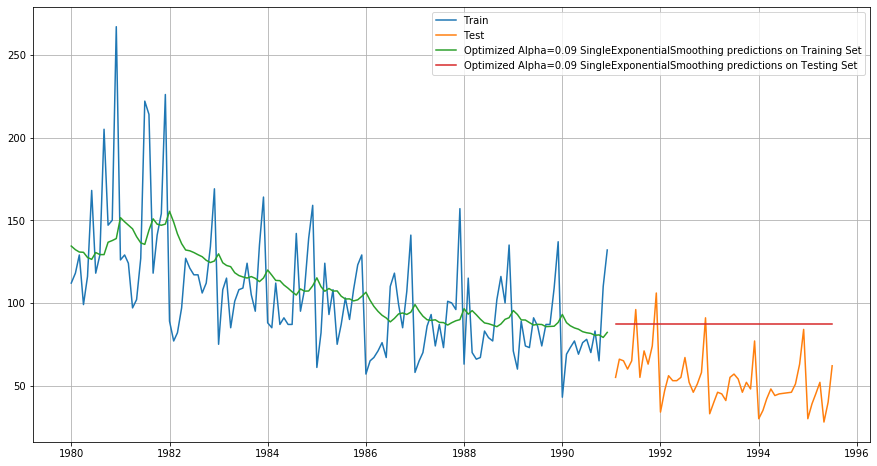

In [168]:
## Plotting on both the Training and Test using SES

plt.plot(rose_SES_train['Rose'], label='Train')
plt.plot(rose_SES_test['Rose'], label='Test')

plt.plot(rose_SES_train['predict'], label='Optimized Alpha=0.09 SingleExponentialSmoothing predictions on Training Set')
plt.plot(rose_SES_test['pred'], label='Optimized Alpha=0.09 SingleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();


In [169]:
# Evaluation (Using RMSE)

rose_SES_train_rmse = metrics.mean_squared_error(rose_SES_train['Rose'],rose_SES_train['predict'],squared=False)
rose_SES_test_rmse = metrics.mean_squared_error(rose_SES_test['Rose'],rose_SES_test['pred'],squared=False)

print(metrics.mean_squared_error(rose_SES_train['Rose'],rose_SES_train['predict'],squared=False))
print(metrics.mean_squared_error(rose_SES_test['Rose'],rose_SES_test['pred'],squared=False))

31.50086855168425
36.86111263603847


In [170]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE':[rose_SES_train_rmse],'Test RMSE': [rose_SES_test_rmse]},index=['Optimized Alpha=0.09 SES'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression          30.718135  2888.216761
Moving Average with 3      22.017650    22.017650
Optimized Alpha=0.09 SES   31.500869    36.861113

# Model 3 - SES(BrutForce parameter) for Sparkling wine sales

In [171]:
rose_slope_param = [x * 0.10 for x in range(0,10)]
rose_slope_param

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [172]:
rose_SES_BF_RMSE = pd.DataFrame(columns = ['Level' , 'RMSE'])

rose_SES_BF_RMSE

Empty DataFrame
Columns: [Level, RMSE]
Index: []

In [173]:
for x in rose_slope_param:
    rose_model_SES_brutforce = rose_model_SES.fit(smoothing_level = x)
    rmse = metrics.mean_squared_error(rose_SES_train['Rose'],rose_model_SES_brutforce.fittedvalues,squared=False)
    rose_SES_BF_RMSE = rose_SES_BF_RMSE.append({'Level' : x , 'RMSE' : '%.12f'%rmse} , ignore_index= True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anacon

In [174]:
rose_SES_BF_RMSE.sort_values(by='RMSE', ascending = True)

Level             RMSE
1    0.1  31.501014531732
2    0.2  31.898670181023
3    0.3  32.448832959021
4    0.4  33.028399612062
5    0.5  33.680192363058
6    0.6  34.439946331641
7    0.7  35.322683257590
0    0.0  36.034234054236
8    0.8  36.334370710206
9    0.9  37.482734743828

In [175]:
rose_model_SES_brutforce = rose_model_SES.fit(smoothing_level = 0.1)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [176]:
rose_model_SES_brutforce.params

{'smoothing_level': 0.1,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.3509493123687,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [177]:
rose_SES_train['BFpredict']  = rose_model_SES_brutforce.fittedvalues

In [178]:
rose_SES_train.head()

Rose     predict   BFpredict
YearMonth                                
1980-01-01  112.0  134.386956  134.350949
1980-02-01  118.0  132.176246  132.115854
1980-03-01  129.0  130.776343  130.704269
1980-04-01   99.0  130.600930  130.533842
1980-05-01  116.0  127.480341  127.380458

In [179]:
# Forecast for test data


rose_SES_test['BFpred'] = rose_model_SES_autofit.forecast(steps = len(rose_SES_test)+1)

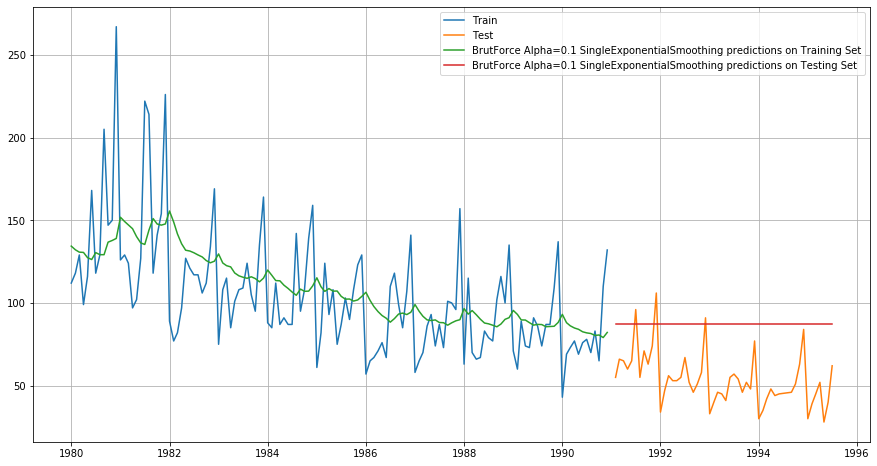

In [180]:
## Plotting on both the Training and Test using Brut Force SES

plt.plot(rose_SES_train['Rose'], label='Train')
plt.plot(rose_SES_test['Rose'], label='Test')

plt.plot(rose_SES_train['BFpredict'], label='BrutForce Alpha=0.1 SingleExponentialSmoothing predictions on Training Set')
plt.plot(rose_SES_test['BFpred'], label='BrutForce Alpha=0.1 SingleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();


In [181]:
# Evaluation (Using RMSE)

rose_SES_train_bf_rmse = metrics.mean_squared_error(rose_SES_train['Rose'],rose_SES_train['BFpredict'],squared=False)
rose_SES_test_bf_rmse = metrics.mean_squared_error(rose_SES_test['Rose'],rose_SES_test['BFpred'],squared=False)

print(metrics.mean_squared_error(rose_SES_train['Rose'],rose_SES_train['BFpredict'],squared=False))
print(metrics.mean_squared_error(rose_SES_test['Rose'],rose_SES_test['BFpred'],squared=False))

31.501014531732384
36.86111263603847


In [182]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE':[rose_SES_train_bf_rmse],'Test RMSE': [rose_SES_test_bf_rmse]},index=['BrutForce Alpha=0.1 SES'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression          30.718135  2888.216761
Moving Average with 3      22.017650    22.017650
Optimized Alpha=0.09 SES   31.500869    36.861113
BrutForce Alpha=0.1 SES    31.501015    36.861113

# Model 4  - DES Holt's Model for Rose wine sales

In [183]:
## Making copies of the training and test set
rose_DES_train = pd.DataFrame(rose_train).copy()
rose_DES_test = pd.DataFrame(rose_test).copy()

In [184]:
rose_model_DES = Holt(rose_DES_train['Rose'])

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [185]:
# Fitting the Double Exponential Smoothing model and asking python to choose the optimal parameters
rose_model_DES_autofit = rose_model_DES.fit(optimized=True)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [186]:
rose_model_DES_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [187]:
rose_DES_train['predict'] = rose_model_SES_autofit.fittedvalues

In [188]:
rose_DES_test['predict'] = rose_model_DES_autofit.forecast(steps=len(rose_DES_test)+1)

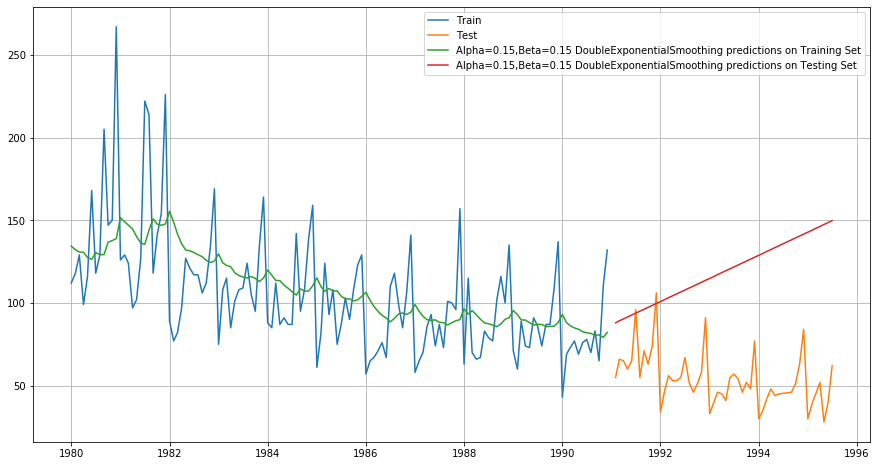

In [189]:
## Plotting on both the Training and Test using Optimized DES

plt.plot(rose_DES_train['Rose'], label='Train')
plt.plot(rose_DES_test['Rose'], label='Test')

plt.plot(rose_DES_train['predict'], label='Alpha=0.15,Beta=0.15 DoubleExponentialSmoothing predictions on Training Set')
plt.plot(rose_DES_test['predict'], label='Alpha=0.15,Beta=0.15 DoubleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();

In [190]:
# Evaluation (Using RMSE)

rose_DES_train_rmse = metrics.mean_squared_error(rose_DES_train['Rose'],rose_DES_train['predict'],squared=False)
rose_DES_test_rmse = metrics.mean_squared_error(rose_DES_test['Rose'],rose_DES_test['predict'],squared=False)

print(metrics.mean_squared_error(rose_DES_train['Rose'],rose_DES_train['predict'],squared=False))
print(metrics.mean_squared_error(rose_DES_test['Rose'],rose_DES_test['predict'],squared=False))

31.50086855168425
71.0823581966056


In [191]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE':[rose_DES_train_rmse],'Test RMSE': [rose_DES_test_rmse]},index=['Optimized Alpha=0.15,Beta=0.15 DES'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                    30.718135  2888.216761
Moving Average with 3                22.017650    22.017650
Optimized Alpha=0.09 SES             31.500869    36.861113
BrutForce Alpha=0.1 SES              31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES   31.500869    71.082358

# MODEL 5 - Optimized TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model for Rose wine sales

In [192]:
# TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model

rose_TES_train = pd.DataFrame(rose_train).copy()
rose_TES_test = pd.DataFrame(rose_test).copy()

In [193]:
rose_model_TES = ExponentialSmoothing(rose_TES_train['Rose'], trend = 'additive' , seasonal='multiplicative' , freq = 'MS', seasonal_periods= 12 )

In [194]:
rose_model_TES_autofit = rose_model_TES.fit(optimized = True)
rose_model_TES_autofit.params

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [195]:
rose_TES_train['predict'] = rose_model_TES_autofit.fittedvalues
rose_TES_train.head()

Rose     predict
YearMonth                    
1980-01-01  112.0  113.105633
1980-02-01  118.0  127.054249
1980-03-01  129.0  137.165648
1980-04-01   99.0  119.844379
1980-05-01  116.0  131.432588

In [196]:
rose_TES_test['predict'] = rose_model_TES_autofit.forecast(steps=len(rose_TES_test)+1)
rose_TES_test.head()

Rose    predict
YearMonth                  
1991-02-01  55.0  63.471272
1991-03-01  66.0  68.788792
1991-04-01  65.0  60.277823
1991-05-01  60.0  67.180378
1991-06-01  65.0  72.461079

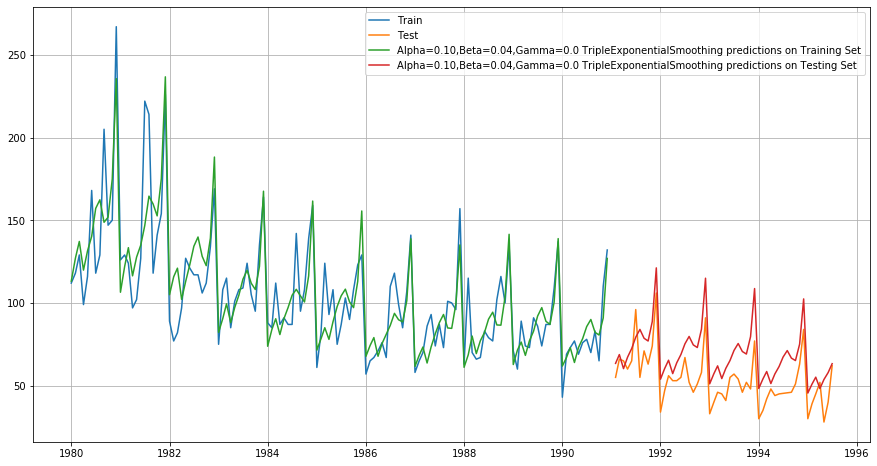

In [197]:
## Plotting on both the Training and Test using Optimized TES

plt.plot(rose_TES_train['Rose'], label='Train')
plt.plot(rose_TES_test['Rose'], label='Test')

plt.plot(rose_TES_train['predict'], label='Alpha=0.10,Beta=0.04,Gamma=0.0 TripleExponentialSmoothing predictions on Training Set')
plt.plot(rose_TES_test['predict'], label='Alpha=0.10,Beta=0.04,Gamma=0.0 TripleExponentialSmoothing predictions on Testing Set')


plt.legend(loc='best')
plt.grid();

In [198]:
# Evaluation (Using RMSE)

rose_TES_train_rmse = metrics.mean_squared_error(rose_TES_train['Rose'],rose_TES_train['predict'],squared=False)
rose_TES_test_rmse = metrics.mean_squared_error(rose_TES_test['Rose'],rose_TES_test['predict'],squared=False)

print(metrics.mean_squared_error(rose_TES_train['Rose'],rose_TES_train['predict'],squared=False))
print(metrics.mean_squared_error(rose_TES_test['Rose'],rose_TES_test['predict'],squared=False))

18.57886028651334
17.52579968636609


In [199]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE':[rose_TES_train_rmse],'Test RMSE': [rose_TES_test_rmse]},index=['Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800

# MODEL 5 - BrutForce TRIPLE EXPONENTIAL SMOOTHING - HOLT WINTER's Model for Rose wine sales

In [200]:
## First we will define an empty dataframe to store our values from the loop

rose_bf_resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE': [],'Test RMSE': []})
rose_bf_resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [201]:
# Declaring an object which has been instantiated by the training data. We are setting the seasonality 
# to be multiplicative

rose_bf_model_TES = ExponentialSmoothing(rose_TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

## 'estimated' is the default entry for the parameter method in the above function. So, the students might choose to not
## pass any other parameter other than the training data

In [202]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from the loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from the loop
        for k in np.arange(0.1,1.1,0.1): #Defining the gamma values from the loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit 
# the Triple Exponential model by varying different alpha and beta parameters. 


            rose_bf_model_TES_alpha_i_j_k = rose_bf_model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            rose_TES_train['BFpredict',i,j,k] = rose_bf_model_TES_alpha_i_j_k.fittedvalues
            rose_TES_test['BFpredict',i,j,k] = rose_bf_model_TES_alpha_i_j_k.forecast(steps=len(rose_TES_test)+1)
        
        
            rose_bf_rmse_model_train = metrics.mean_squared_error(rose_TES_train['Rose'],rose_TES_train['BFpredict',i,j,k],squared=False)
            rose_bf_rmse_model_test = metrics.mean_squared_error(rose_TES_test['Rose'],rose_TES_test['BFpredict',i,j,k],squared=False)
            rose_bf_resultsDf_TES = rose_bf_resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rose_bf_rmse_model_train,
                                                  'Test RMSE':rose_bf_rmse_model_test}, ignore_index=True)

In [203]:
rose_bf_resultsDf_TES

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1     25.216699     12.907797
1             0.1          0.1           0.2     24.057626     12.021545
2             0.1          0.1           0.3     23.645037     11.950281
3             0.1          0.1           0.4     23.570939     12.227447
4             0.1          0.1           0.5     23.718878     12.733456
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  28358.458519   9692.139618
996           1.0          1.0           0.7  30724.126331  23242.217490
997           1.0          1.0           0.8   1218.755446   9715.438173
998           1.0          1.0           0.9  14150.253251   9781.229871
999           1.0          1.0           1.0   1768.254189   8213.607311

[1000 rows x 5 columns]

In [204]:
print('Sorting the values with respect to RMSE:')
display(rose_bf_resultsDf_TES.sort_values(by=['Train RMSE']).head())

Sorting the values with respect to RMSE:


Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
3            0.1          0.1           0.4   23.570939  12.227447
2            0.1          0.1           0.3   23.645037  11.950281
4            0.1          0.1           0.5   23.718878  12.733456
13           0.1          0.2           0.4   23.919163  10.453479
12           0.1          0.2           0.3   23.969166  10.006582

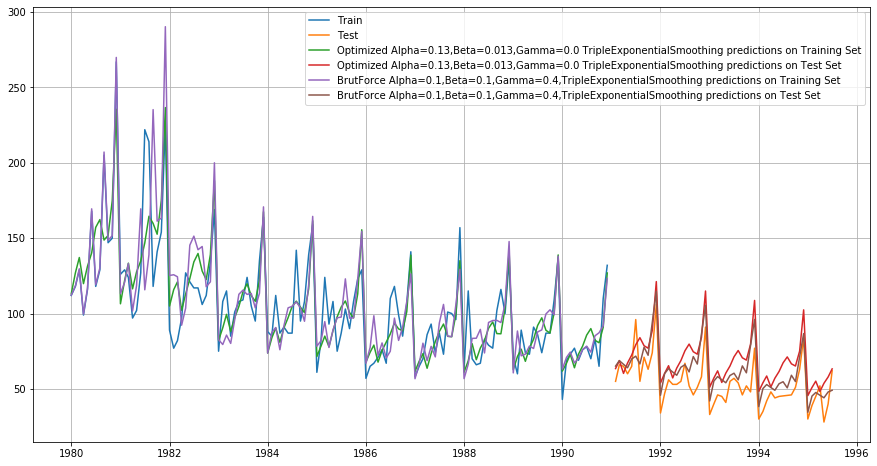

In [205]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.plot(rose_TES_train['Rose'], label='Train')
plt.plot(rose_TES_test['Rose'], label='Test')

plt.plot(rose_TES_train['predict'], label='Optimized Alpha=0.13,Beta=0.013,Gamma=0.0 TripleExponentialSmoothing predictions on Training Set')
plt.plot(rose_TES_test['predict'], label='Optimized Alpha=0.13,Beta=0.013,Gamma=0.0 TripleExponentialSmoothing predictions on Test Set')


## Alpha=0.1,Beta=0.2,Gamma=0.2 (model which has the minimum RMSE on the Brut Force test data)
plt.plot(rose_TES_train['BFpredict', 0.1, 0.1, 0.4], label='BrutForce Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(rose_TES_test['BFpredict', 0.1, 0.1, 0.4], label='BrutForce Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [206]:
# Evaluation (Using RMSE)

rose_TES_train_rmse = metrics.mean_squared_error(rose_TES_train['Rose'],rose_TES_train['BFpredict', 0.1, 0.1, 0.4],squared=False)
rose_TES_test_rmse = metrics.mean_squared_error(rose_TES_test['Rose'],rose_TES_test['BFpredict', 0.1, 0.1, 0.4],squared=False)

print(metrics.mean_squared_error(rose_TES_train['Rose'],rose_TES_train['BFpredict', 0.1, 0.1, 0.4],squared=False))
print(metrics.mean_squared_error(rose_TES_test['Rose'],rose_TES_test['BFpredict', 0.1, 0.1, 0.4],squared=False))

23.57093861232462
12.227446636774628


In [207]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE':[rose_TES_train_rmse],'Test RMSE': [rose_TES_test_rmse]},index=['BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES    23.570939    12.227447

# Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05


Augmented Dickey-Fuller Test --> ;  
Null Hypothesis      : H0 : Data is non-stationary  ;  
Alternate Hypothesis : H1 : Data is stationary 

In [208]:
from statsmodels.tsa.stattools import adfuller

Sparkling wine monthly sales time series data stationarity test

In [209]:
sparkling_dftest = adfuller(sparkling_train,regression='ct')
print('DF test statistic is %3.3f' %sparkling_dftest[0])
print('DF test p-value is' ,sparkling_dftest[1])
print('Number of lags used' ,sparkling_dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [210]:
## Defning a function
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,regression='ct')#running the adf test on the input time series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    ## creating a series to format the output
    for key,value in dftest[4].items():##running a for loop to format the critical values of the test statistic
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [211]:
adf_test(sparkling_train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.061798
p-value                          0.567411
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -4.036934
Critical Value (5%)             -3.448049
Critical Value (10%)            -3.149068
dtype: float64


We see that the series is not stationary and thus we are going to take the first difference.

In [212]:
adf_test(sparkling_train.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.967842e+00
p-value                        8.479211e-11
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -4.036934e+00
Critical Value (5%)           -3.448049e+00
Critical Value (10%)          -3.149068e+00
dtype: float64


The series has become stationary.

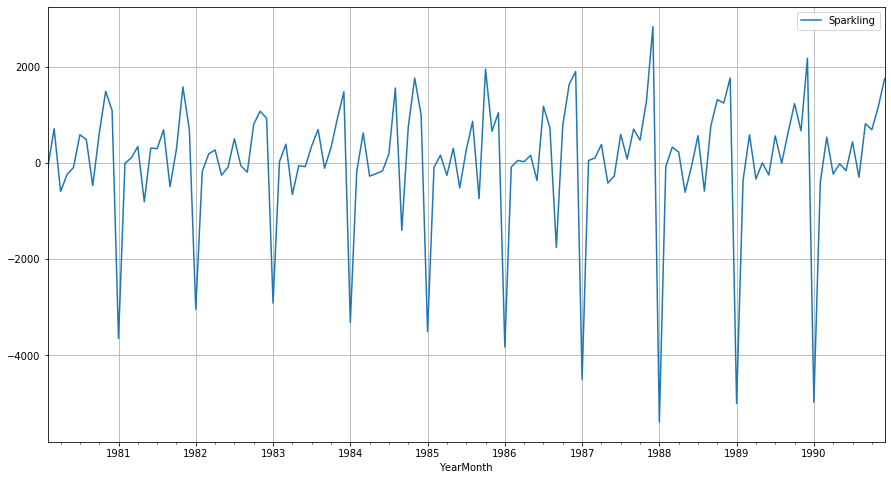

In [213]:
(sparkling_train.diff(1).dropna()).plot(grid=True);

Rose wine monthly sales time series data stationarity test

In [214]:
adf_test(rose_train)

Results of Dickey-Fuller Test:
Test Statistic                  -1.686149
p-value                          0.756909
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -4.037614
Critical Value (5%)             -3.448373
Critical Value (10%)            -3.149257
dtype: float64


We see that the series is not stationary and thus we are going to take the first difference.

In [215]:
adf_test(rose_train.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -6.804433e+00
p-value                        3.894831e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -4.037614e+00
Critical Value (5%)           -3.448373e+00
Critical Value (10%)          -3.149257e+00
dtype: float64


The series has become stationary.

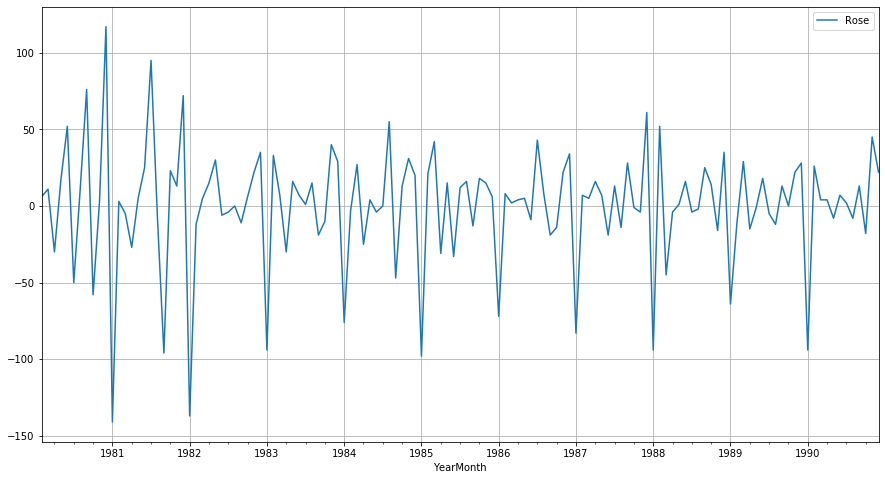

In [216]:
(rose_train.diff(1).dropna()).plot(grid=True);

# Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


# ARIMA for Sparkling wine sales time series data

In [217]:
from statsmodels.tsa.arima.model import ARIMA

In [218]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
sparkling_pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(sparkling_pdq)):
    print('Model: {}'.format(sparkling_pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [219]:
# Creating an empty Dataframe with column names only
sparkling_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
sparkling_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [220]:
for param in sparkling_pdq:# running a loop within the pdq parameters defined by itertools
    sparkling_ARIMA_model = ARIMA(sparkling_train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,sparkling_ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    sparkling_ARIMA_AIC = sparkling_ARIMA_AIC.append({'param':param, 'AIC': sparkling_ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591681
ARIMA(0, 1, 2) - AIC:2234.4083231146233
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.7550946665842


C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.527200450928
ARIMA(2, 1, 0) - AIC:2260.3657439680865
ARIMA(2, 1, 1) - AIC:2233.7776262682764
ARIMA(2, 1, 2) - AIC:2213.5092126596796


In [221]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

sparkling_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [222]:
sparkling_auto_ARIMA = ARIMA(sparkling_train, order=(2,1,2),freq='MS')

sparkling_results_auto_ARIMA = sparkling_auto_ARIMA.fit()

print(sparkling_results_auto_ARIMA.summary())

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Thu, 24 Jun 2021   AIC                           2213.509
Time:                        10:27:10   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.780      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

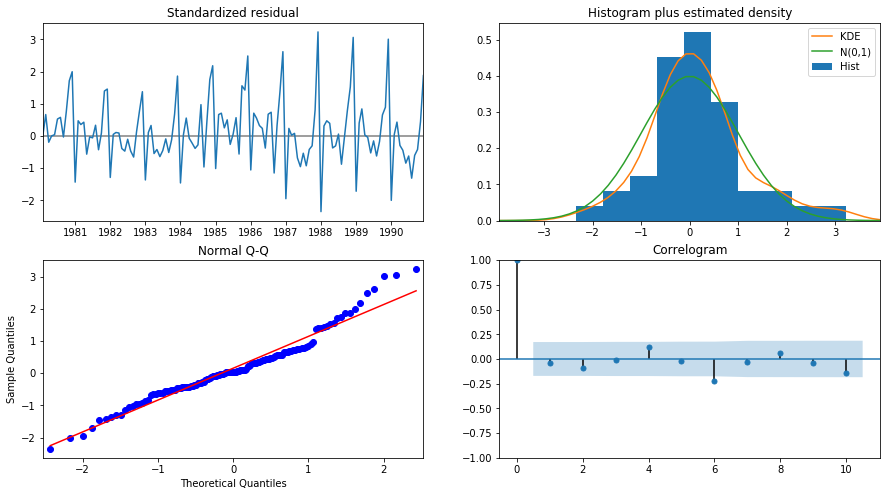

In [223]:
sparkling_results_auto_ARIMA.plot_diagnostics();

In [224]:
sparkling_predicted_auto_ARIMA = sparkling_results_auto_ARIMA.get_forecast(steps=len(sparkling_test))

In [225]:
sparkling_predicted_auto_ARIMA.summary_frame().head()

Sparkling          mean      mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  4252.386822  1056.185205    2182.301859    6322.471785
1991-02-01  2863.142353  1113.839930     680.056206    5046.228501
1991-03-01  2044.013540  1119.832313    -150.817462    4238.844541
1991-04-01  1746.221714  1171.196632    -549.281504    4041.724933
1991-05-01  1813.620880  1230.121415    -597.372790    4224.614550

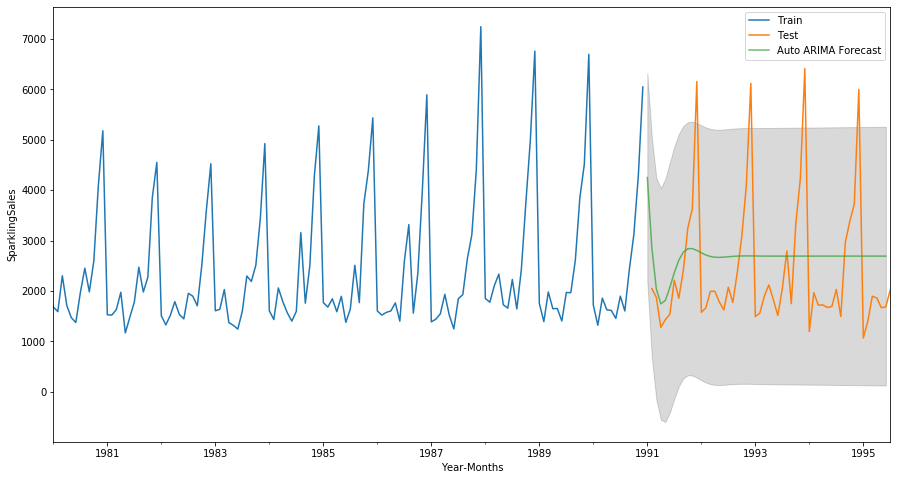

In [226]:
# plot the forecast along with the confidence band
axis = sparkling_train['Sparkling'].plot(label = 'Train')
axis = sparkling_test['Sparkling'].plot(label = 'Test')
sparkling_predicted_auto_ARIMA.summary_frame()['mean'].plot(ax=axis, label = 'Auto ARIMA Forecast' , alpha=0.7 )
axis.fill_between(sparkling_predicted_auto_ARIMA.summary_frame().index,
                 sparkling_predicted_auto_ARIMA.summary_frame()['mean_ci_lower'],
                 sparkling_predicted_auto_ARIMA.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SparklingSales')
plt.legend(loc="best")
plt.show()

In [227]:
sparkling_RMSE_train = metrics.mean_squared_error(sparkling_train['Sparkling'],sparkling_results_auto_ARIMA.fittedvalues,squared=False)

In [228]:
sparkling_RMSE_test = metrics.mean_squared_error(sparkling_test['Sparkling'],sparkling_predicted_auto_ARIMA.predicted_mean,squared=False)

In [229]:
resultsDf_temp = pd.DataFrame({'Test RMSE': sparkling_RMSE_test, 'Train RMSE': sparkling_RMSE_train},index=['AutoARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES     380.278116   812.812970
AutoARIMA(2,1,2)                               1082.422344  1307.777222

# SARIMA for Sparkling wine sales time series data

In [230]:
# Seasonal ARIMA

In [231]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
sparkling_s_pdq = list(itertools.product(p, d, q))
sparkling_s_model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(sparkling_s_pdq)):
    print('Model: {}{}'.format(sparkling_s_pdq[i], sparkling_s_model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 7)
Model: (0, 1, 2)(0, 1, 2, 7)
Model: (1, 1, 0)(1, 1, 0, 7)
Model: (1, 1, 1)(1, 1, 1, 7)
Model: (1, 1, 2)(1, 1, 2, 7)
Model: (2, 1, 0)(2, 1, 0, 7)
Model: (2, 1, 1)(2, 1, 1, 7)
Model: (2, 1, 2)(2, 1, 2, 7)


In [232]:
sparkling_s_model_pdq

[(0, 1, 0, 7),
 (0, 1, 1, 7),
 (0, 1, 2, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7),
 (1, 1, 2, 7),
 (2, 1, 0, 7),
 (2, 1, 1, 7),
 (2, 1, 2, 7)]

In [233]:
import statsmodels.api as sm

In [234]:
sparkling_s_SARIMA_model = sm.tsa.statespace.SARIMAX(sparkling_train,order = (2,1,2) , seasonal_order= (0, 1, 0, 7), enforce_stationarity= False, enforce_invertibility= False)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [235]:
sparkling_s_results_SARIMA = sparkling_s_SARIMA_model.fit(maxiter=1000)

In [236]:
sparkling_s_results_SARIMA.aic

2159.82788825739

In [237]:
sparkling_s_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
sparkling_s_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [238]:

for param in sparkling_s_pdq:
    for param_seasonal in sparkling_s_model_pdq:
        sparkling_s_SARIMA_model = sm.tsa.statespace.SARIMAX(sparkling_train,order = param , 
                                             seasonal_order= param_seasonal, 
                                             enforce_stationarity= False, 
                                             enforce_invertibility= False)
        sparkling_s_results_SARIMA = sparkling_s_SARIMA_model.fit(maxiter=100)
        sparkling_s_SARIMA_AIC = sparkling_s_SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': sparkling_s_results_SARIMA.aic}, ignore_index=True)



C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

In [239]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

sparkling_s_SARIMA_AIC.sort_values(by='AIC',ascending=True)

param      seasonal          AIC
77  (2, 1, 2)  (1, 1, 2, 7)  1842.910676
26  (0, 1, 2)  (2, 1, 2, 7)  1845.639981
23  (0, 1, 2)  (1, 1, 2, 7)  1847.255706
20  (0, 1, 2)  (0, 1, 2, 7)  1848.761885
74  (2, 1, 2)  (0, 1, 2, 7)  1852.304109
..        ...           ...          ...
36  (1, 1, 1)  (0, 1, 0, 7)  2183.604587
54  (2, 1, 0)  (0, 1, 0, 7)  2202.051670
9   (0, 1, 1)  (0, 1, 0, 7)  2204.143565
0   (0, 1, 0)  (0, 1, 0, 7)  2220.817252
27  (1, 1, 0)  (0, 1, 0, 7)  2221.818605

[81 rows x 3 columns]

In [240]:
import statsmodels.api as sm
sparkling_s_auto_SARIMA = sm.tsa.statespace.SARIMAX(sparkling_train, order=(2,1,2),seasonal_order=(1,1,2,7),freq='MS')

sparkling_s_results_auto_SARIMA = sparkling_s_auto_SARIMA.fit(maxiter=1000)

print(sparkling_s_results_auto_SARIMA.summary())

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 7)   Log Likelihood               -1056.085
Date:                           Thu, 24 Jun 2021   AIC                           2128.171
Time:                                   10:28:36   BIC                           2150.733
Sample:                               01-01-1980   HQIC                          2137.336
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3587      0.056     24.203      0.000       1.249       1.469
ar.L2         -0.6428      0.071     -9.053

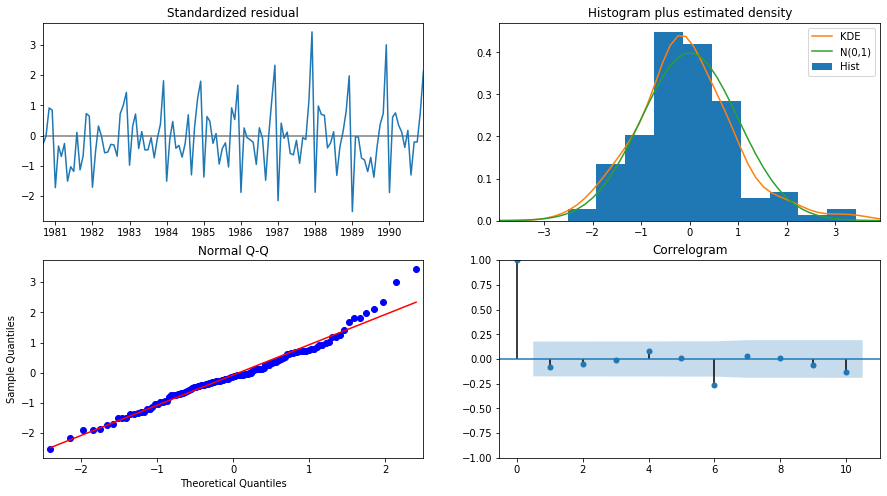

In [241]:
sparkling_s_results_auto_SARIMA.plot_diagnostics();

In [242]:
sparkling_s_predicted_auto_SARIMA = sparkling_s_results_auto_SARIMA.get_forecast(steps=len(sparkling_test))

In [243]:
sparkling_s_predicted_auto_SARIMA.summary_frame().head()

Sparkling          mean      mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  4252.431597  1099.104528    2098.226306    6406.636888
1991-02-01  2302.606672  1194.970232     -39.491945    4644.705289
1991-03-01  2140.710009  1193.697976    -198.895033    4480.315051
1991-04-01  1842.033637  1217.517704    -544.257214    4228.324488
1991-05-01  2094.183649  1245.990559    -347.912971    4536.280269

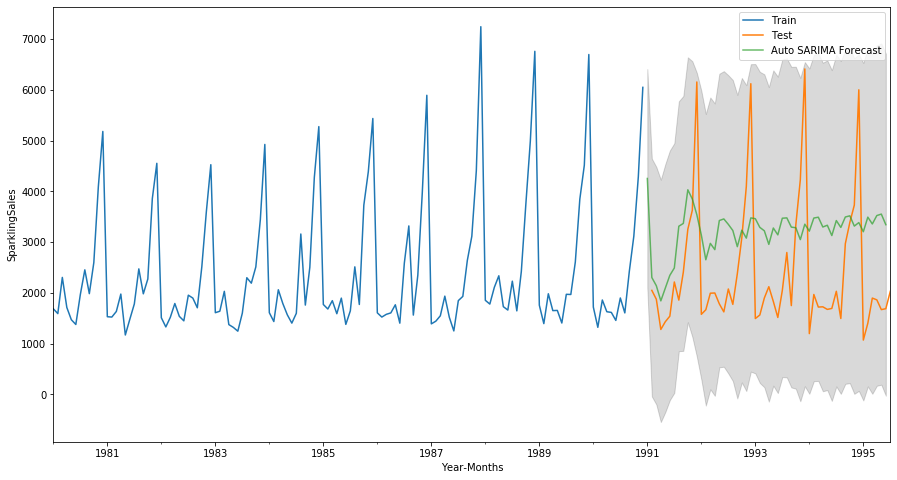

In [244]:
# plot the forecast along with the confidence band
axis = sparkling_train['Sparkling'].plot(label = 'Train')
axis = sparkling_test['Sparkling'].plot(label = 'Test')
sparkling_s_predicted_auto_SARIMA.summary_frame()['mean'].plot(ax=axis, label = 'Auto SARIMA Forecast' , alpha=0.7 )
axis.fill_between(sparkling_s_predicted_auto_SARIMA.summary_frame().index,
                 sparkling_s_predicted_auto_SARIMA.summary_frame()['mean_ci_lower'],
                 sparkling_s_predicted_auto_SARIMA.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SparklingSales')
plt.legend(loc="best")
plt.show()

In [245]:
sparkling_s_RMSE_train = metrics.mean_squared_error(sparkling_train['Sparkling'],sparkling_s_results_auto_SARIMA.fittedvalues,squared=False)

In [246]:
sparkling_s_RMSE_test = metrics.mean_squared_error(sparkling_test['Sparkling'],sparkling_s_predicted_auto_SARIMA.predicted_mean,squared=False)

In [247]:
resultsDf_temp = pd.DataFrame({'Test RMSE': sparkling_s_RMSE_test,'Train RMSE': sparkling_s_RMSE_test},index=['AutoSARIMA(2,1,2)(1,1,2,7)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES     380.278116   812.812970
AutoARIMA(2,1,2)                               1082.422344  1307.777222
AutoSARIMA(2,1,2)(1,1,2,7)                     1513.877499  1513.877499

# ARIMA for Rose wine sales time series data

In [248]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
rose_pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(rose_pdq)):
    print('Model: {}'.format(rose_pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [249]:
# Creating an empty Dataframe with column names only
rose_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
rose_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [250]:
for param in rose_pdq:# running a loop within the pdq parameters defined by itertools
    rose_ARIMA_model = ARIMA(rose_train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,rose_ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    rose_ARIMA_AIC = rose_ARIMA_AIC.append({'param':param, 'AIC': rose_ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.154672912435
ARIMA(0, 1, 1) - AIC:1282.3098319748324
ARIMA(0, 1, 2) - AIC:1279.671528853577
ARIMA(1, 1, 0) - AIC:1317.3503105381455
ARIMA(1, 1, 1) - AIC:1280.574229538008
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341604872
ARIMA(2, 1, 1) - AIC:1281.5078621868395
ARIMA(2, 1, 2) - AIC:1281.8707222264247


In [251]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

rose_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [252]:
rose_auto_ARIMA = ARIMA(rose_train, order=(0,1,2),freq='MS')

rose_results_auto_ARIMA = rose_auto_ARIMA.fit()

print(rose_results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Thu, 24 Jun 2021   AIC                           1279.672
Time:                        10:28:40   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


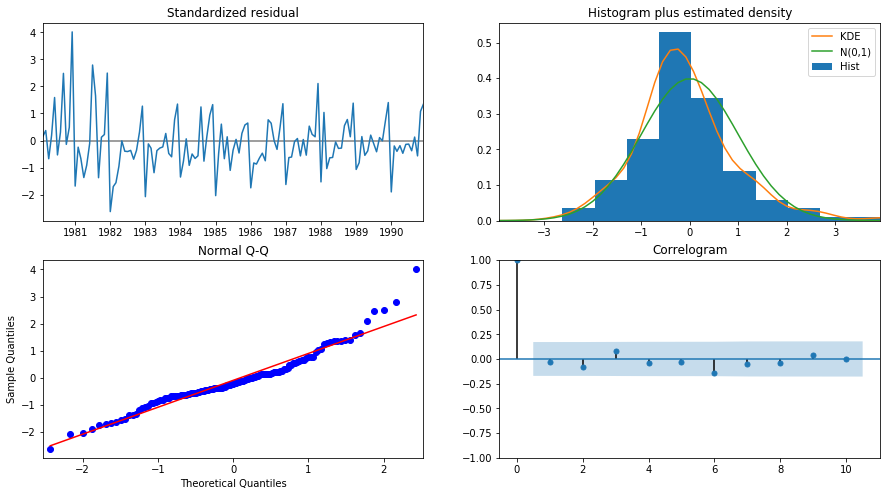

In [253]:
rose_results_auto_ARIMA.plot_diagnostics();

In [254]:
rose_predicted_auto_ARIMA = rose_results_auto_ARIMA.get_forecast(steps=len(rose_test))

In [255]:
rose_predicted_auto_ARIMA.summary_frame().head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  96.026636  31.077978      35.114919     156.938353
1991-02-01  87.495114  32.472957      23.849288     151.140939
1991-03-01  87.495114  32.617749      23.565500     151.424728
1991-04-01  87.495114  32.761902      23.282966     151.707262
1991-05-01  87.495114  32.905423      23.001669     151.988558

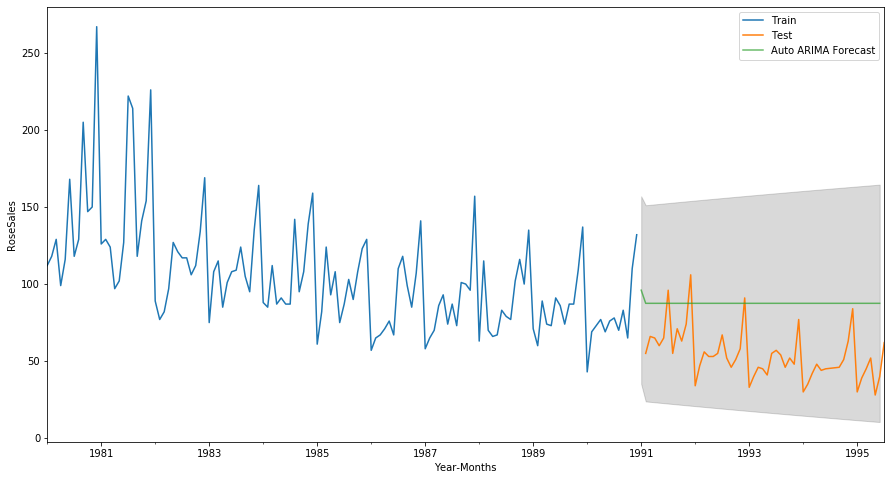

In [256]:
# plot the forecast along with the confidence band
axis = rose_train['Rose'].plot(label = 'Train')
axis = rose_test['Rose'].plot(label = 'Test')
rose_predicted_auto_ARIMA.summary_frame()['mean'].plot(ax=axis, label = 'Auto ARIMA Forecast' , alpha=0.7 )
axis.fill_between(rose_predicted_auto_ARIMA.summary_frame().index,
                 rose_predicted_auto_ARIMA.summary_frame()['mean_ci_lower'],
                 rose_predicted_auto_ARIMA.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseSales')
plt.legend(loc="best")
plt.show()

In [257]:
rose_RMSE_train = metrics.mean_squared_error(rose_train['Rose'],rose_results_auto_ARIMA.fittedvalues,squared=False)

In [258]:
rose_RMSE_test = metrics.mean_squared_error(rose_test['Rose'],rose_predicted_auto_ARIMA.predicted_mean,squared=False)

In [259]:
rose_resultsDf_temp = pd.DataFrame({'Test RMSE': rose_RMSE_test, 'Train RMSE': rose_RMSE_train},index=['ARIMA(0,1,2)'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES    23.570939    12.227447
ARIMA(0,1,2)                                   32.620772    37.369168

# SARIMA for Sparkling wine sales time series data

In [260]:
# Seasonal ARIMA

In [261]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
rose_pdq = list(itertools.product(p, d, q))
rose_model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(rose_pdq)):
    print('Model: {}{}'.format(rose_pdq[i], rose_model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 7)
Model: (0, 1, 2)(0, 1, 2, 7)
Model: (1, 1, 0)(1, 1, 0, 7)
Model: (1, 1, 1)(1, 1, 1, 7)
Model: (1, 1, 2)(1, 1, 2, 7)
Model: (2, 1, 0)(2, 1, 0, 7)
Model: (2, 1, 1)(2, 1, 1, 7)
Model: (2, 1, 2)(2, 1, 2, 7)


In [262]:
rose_model_pdq

[(0, 1, 0, 7),
 (0, 1, 1, 7),
 (0, 1, 2, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7),
 (1, 1, 2, 7),
 (2, 1, 0, 7),
 (2, 1, 1, 7),
 (2, 1, 2, 7)]

In [263]:
import statsmodels.api as sm

In [264]:
rose_SARIMA_model = sm.tsa.statespace.SARIMAX(rose_train,order = (2,1,2) , seasonal_order= (0, 1, 0, 7), enforce_stationarity= False, enforce_invertibility= False)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [265]:
rose_results_SARIMA = rose_SARIMA_model.fit(maxiter=1000)

In [266]:
rose_results_SARIMA.aic

1272.967149159609

In [267]:
rose_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
rose_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [268]:

for param in rose_pdq:
    for param_seasonal in rose_model_pdq:
        rose_SARIMA_model = sm.tsa.statespace.SARIMAX(rose_train,order = param , 
                                             seasonal_order= param_seasonal, 
                                             enforce_stationarity= False, 
                                             enforce_invertibility= False)
        rose_results_SARIMA = rose_SARIMA_model.fit(maxiter=100)
        rose_SARIMA_AIC = rose_SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': rose_results_SARIMA.aic}, ignore_index=True)



C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

In [269]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

rose_SARIMA_AIC.sort_values(by='AIC',ascending=True)

param      seasonal          AIC
50  (1, 1, 2)  (1, 1, 2, 7)  1044.399302
80  (2, 1, 2)  (2, 1, 2, 7)  1045.887596
77  (2, 1, 2)  (1, 1, 2, 7)  1046.299415
53  (1, 1, 2)  (2, 1, 2, 7)  1048.331899
74  (2, 1, 2)  (0, 1, 2, 7)  1048.509303
..        ...           ...          ...
63  (2, 1, 1)  (0, 1, 0, 7)  1282.136788
9   (0, 1, 1)  (0, 1, 0, 7)  1289.134052
54  (2, 1, 0)  (0, 1, 0, 7)  1301.725197
27  (1, 1, 0)  (0, 1, 0, 7)  1328.623096
0   (0, 1, 0)  (0, 1, 0, 7)  1339.153772

[81 rows x 3 columns]

In [270]:
rose_auto_SARIMA = sm.tsa.statespace.SARIMAX(rose_train, order=(1,1,2), seasonal_order=(1,1,2,7), freq='MS')

rose_results_auto_SARIMA = rose_auto_SARIMA.fit()

print(rose_results_auto_SARIMA.summary())

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 7)   Log Likelihood                -613.049
Date:                           Thu, 24 Jun 2021   AIC                           1240.098
Time:                                   10:29:43   BIC                           1259.840
Sample:                               01-01-1980   HQIC                          1248.118
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5085      0.240     -2.121      0.034      -0.978      -0.039
ma.L1         -0.2230      0.212     -1.050

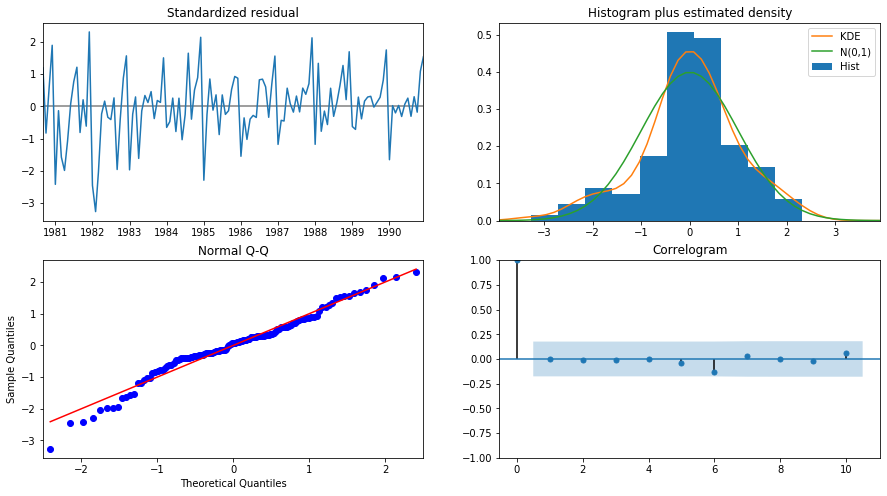

In [271]:
rose_results_auto_SARIMA.plot_diagnostics();

In [272]:
rose_predicted_auto_SARIMA = rose_results_auto_SARIMA.get_forecast(steps=len(rose_test))

In [273]:
rose_predicted_auto_SARIMA.summary_frame().head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  89.108852  31.528772      27.313595     150.904110
1991-02-01  75.845001  32.652768      11.846752     139.843251
1991-03-01  77.776890  32.670322      13.744235     141.809545
1991-04-01  77.035126  32.876476      12.598417     141.471835
1991-05-01  69.582223  32.891318       5.116424     134.048021

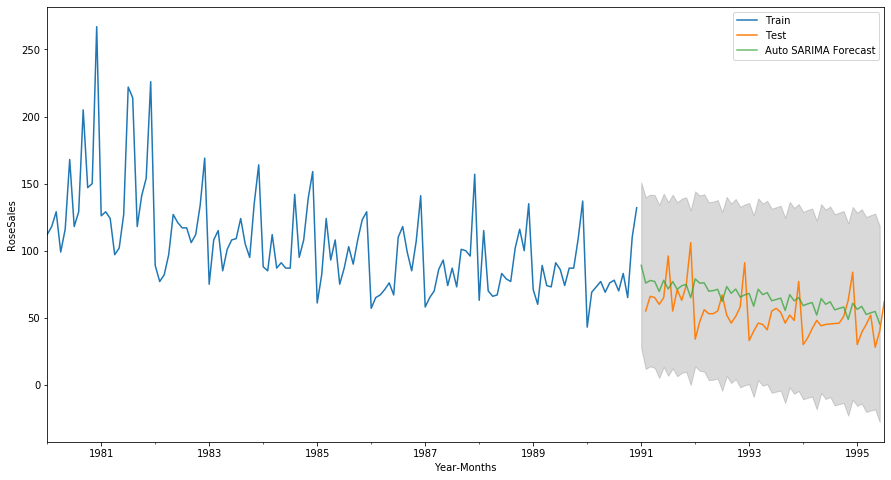

In [274]:
# plot the forecast along with the confidence band
axis = rose_train['Rose'].plot(label = 'Train')
axis = rose_test['Rose'].plot(label = 'Test')
rose_predicted_auto_SARIMA.summary_frame()['mean'].plot(ax=axis, label = 'Auto SARIMA Forecast' , alpha=0.7 )
axis.fill_between(rose_predicted_auto_SARIMA.summary_frame().index,
                 rose_predicted_auto_SARIMA.summary_frame()['mean_ci_lower'],
                 rose_predicted_auto_SARIMA.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseSales')
plt.legend(loc="best")
plt.show()

In [275]:
rose_S_RMSE_train = metrics.mean_squared_error(rose_train['Rose'],rose_results_auto_SARIMA.fittedvalues,squared=False)

In [276]:
rose_S_RMSE_test = metrics.mean_squared_error(rose_test['Rose'],rose_predicted_auto_SARIMA.predicted_mean,squared=False)

In [277]:
rose_resultsDf_temp = pd.DataFrame({'Test RMSE': rose_S_RMSE_test,'Train RMSE': rose_S_RMSE_train},index=['SARIMA(1,1,2)(1,1,2,7)'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES    23.570939    12.227447
ARIMA(0,1,2)                                   32.620772    37.369168
SARIMA(1,1,2)(1,1,2,7)                         37.518402    19.611249

# Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE


# Manual ARIMA for Sparkling wine monthly sales time series data

In [278]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

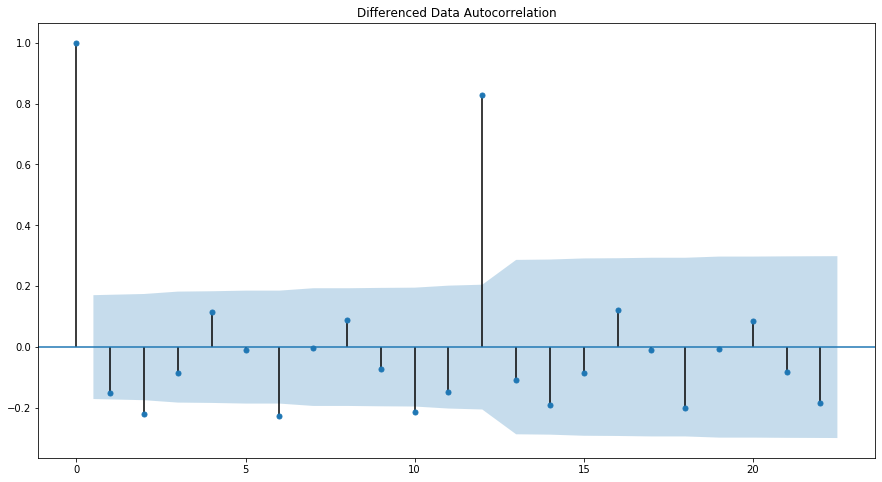

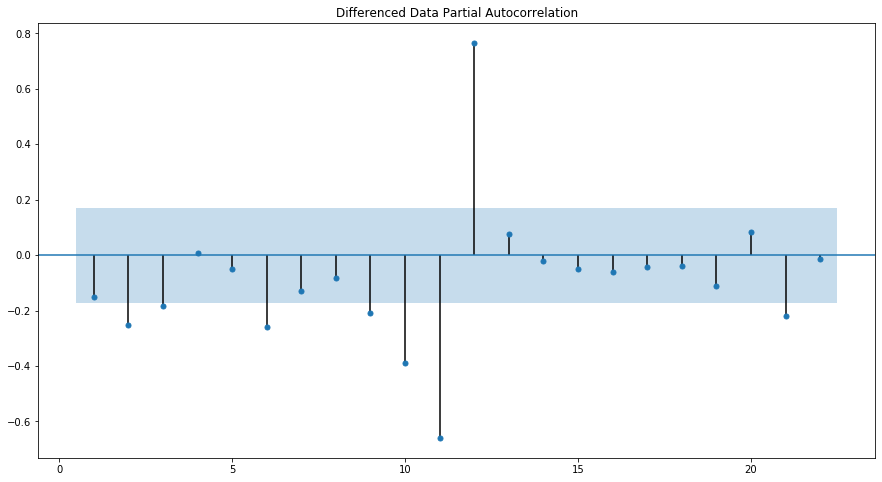

In [279]:
plot_acf(sparkling_train.diff(1),title='Differenced Data Autocorrelation',missing='drop',alpha=0.05)
plot_pacf(sparkling_train.diff(1).dropna(),title='Differenced Data Partial Autocorrelation',zero=False,alpha=0.05);

In [280]:
sparkling_ARIMA_manual = ARIMA(sparkling_train, order=(0,1,0),freq='MS')

sparkling_ARIMA_manual = sparkling_ARIMA_manual.fit()

print(sparkling_ARIMA_manual.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Thu, 24 Jun 2021   AIC                           2267.663
Time:                        10:29:46   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (Q):                      347.60   Jarque-Bera (JB):               198.83
Prob(Q):                              0.00   Pr

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


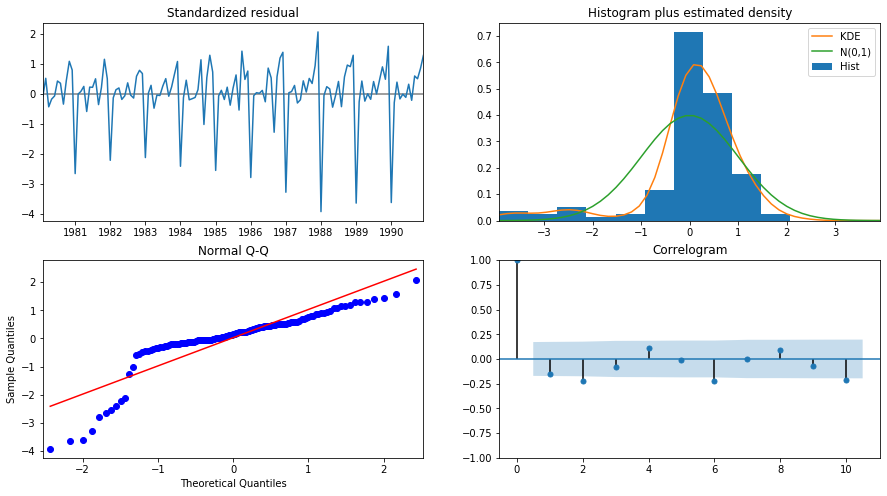

In [281]:
sparkling_ARIMA_manual.plot_diagnostics();

In [282]:
sparkling_ARIMA_manual_pred = sparkling_ARIMA_manual.get_forecast(steps=len(sparkling_test))

In [283]:
sparkling_ARIMA_manual_pred.summary_frame().head()

Sparkling     mean      mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  6047.0  1373.082528    3355.807697    8738.192303
1991-02-01  6047.0  1941.831933    2241.079347    9852.920653
1991-03-01  6047.0  2378.248702    1385.718199   10708.281801
1991-04-01  6047.0  2746.165056     664.615395   11429.384605
1991-05-01  6047.0  3070.305871      29.311071   12064.688929

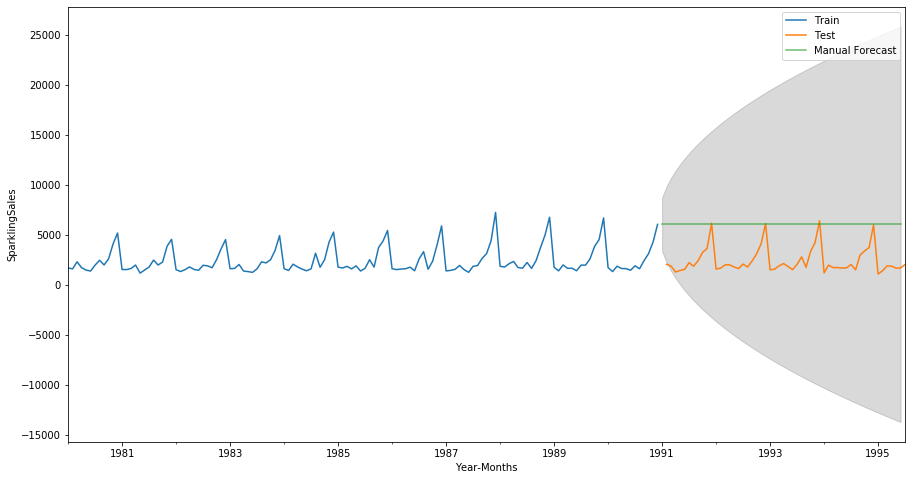

In [284]:
# plot the forecast along with the confidence band
axis = sparkling_train['Sparkling'].plot(label = 'Train')
axis = sparkling_test['Sparkling'].plot(label = 'Test')
sparkling_ARIMA_manual_pred.summary_frame()['mean'].plot(ax=axis, label = 'Manual Forecast' , alpha=0.7 )
axis.fill_between(sparkling_ARIMA_manual_pred.summary_frame().index,
                 sparkling_ARIMA_manual_pred.summary_frame()['mean_ci_lower'],
                 sparkling_ARIMA_manual_pred.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SparklingSales')
plt.legend(loc="best")
plt.show()

In [285]:
sparkling_RMSE_train = metrics.mean_squared_error(sparkling_train['Sparkling'],sparkling_ARIMA_manual.fittedvalues,squared=False)

In [286]:
sparkling_RMSE_test = metrics.mean_squared_error(sparkling_test['Sparkling'],sparkling_ARIMA_manual_pred.predicted_mean,squared=False)

In [287]:
resultsDf_temp = pd.DataFrame({'Train RMSE': sparkling_RMSE_train, 'Test RMSE': sparkling_RMSE_test},index=['ManualARIMA(0,1,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES     380.278116   812.812970
AutoARIMA(2,1,2)                               1082.422344  1307.777222
AutoSARIMA(2,1,2)(1,1,2,7)                     1513.877499  1513.877499
ManualARIMA(0,1,0)                             1380.902041  3858.888237

# Manual ARIMA for Rose wines monthly sales

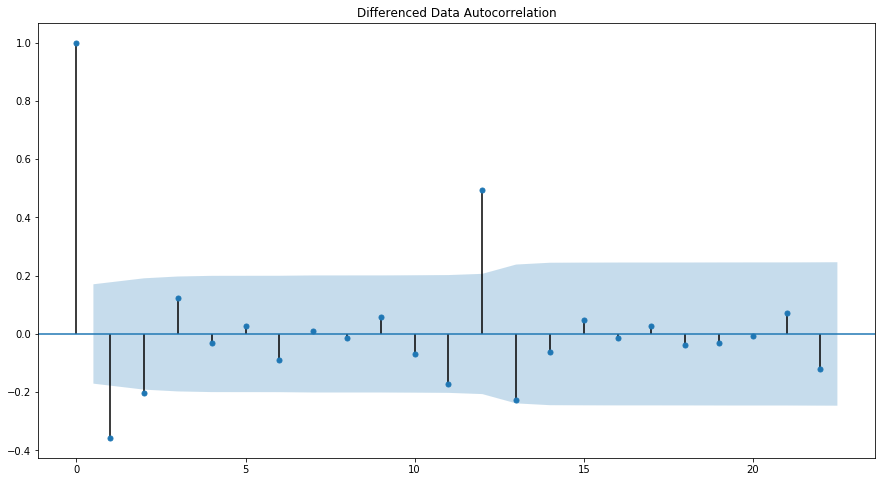

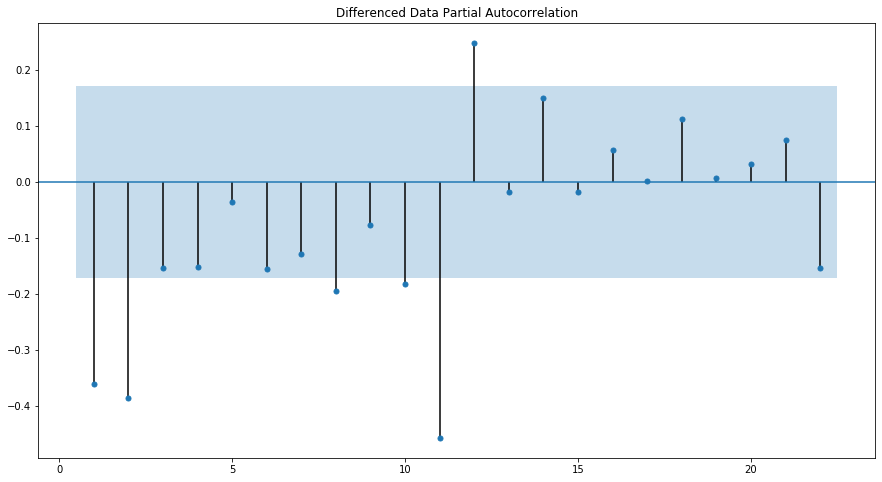

In [288]:
plot_acf(rose_train.diff(1),title='Differenced Data Autocorrelation',missing='drop',alpha=0.05)
plot_pacf(rose_train.diff(1).dropna(),title='Differenced Data Partial Autocorrelation',zero=False,alpha=0.05);

In [289]:
rose_ARIMA_manual = ARIMA(rose_train, order=(2,1,2),freq='MS')

rose_ARIMA_manual = rose_ARIMA_manual.fit()

print(rose_ARIMA_manual.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Thu, 24 Jun 2021   AIC                           1281.871
Time:                        10:29:49   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


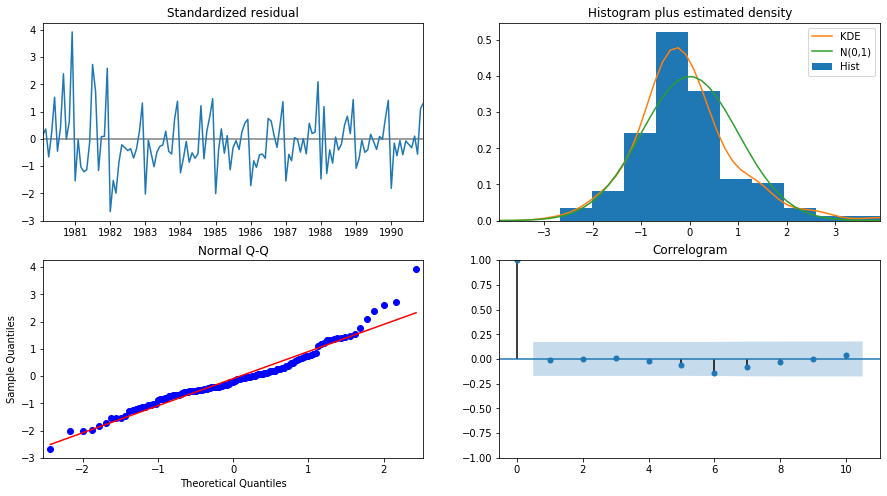

In [290]:
rose_ARIMA_manual.plot_diagnostics();

In [291]:
rose_ARIMA_manual_pred = rose_ARIMA_manual.get_forecast(steps=len(rose_test))

In [292]:
rose_ARIMA_manual_pred.summary_frame().head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  91.159512  30.857091      30.680724     151.638299
1991-02-01  85.314628  32.145110      22.311369     148.317887
1991-03-01  87.962468  32.148483      24.952600     150.972337
1991-04-01  86.759563  32.440222      23.177897     150.341230
1991-05-01  87.306038  32.542684      23.523549     151.088527

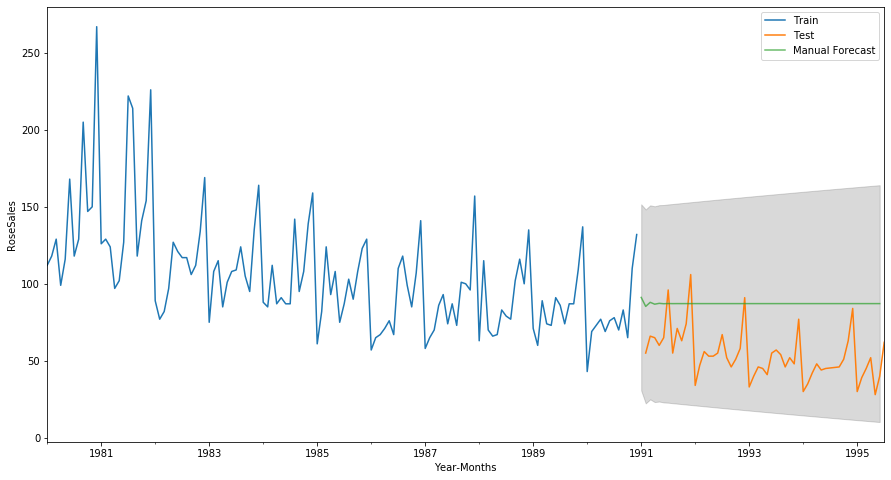

In [293]:
# plot the forecast along with the confidence band
axis = rose_train['Rose'].plot(label = 'Train')
axis = rose_test['Rose'].plot(label = 'Test')
rose_ARIMA_manual_pred.summary_frame()['mean'].plot(ax=axis, label = 'Manual Forecast' , alpha=0.7 )
axis.fill_between(rose_ARIMA_manual_pred.summary_frame().index,
                 rose_ARIMA_manual_pred.summary_frame()['mean_ci_lower'],
                 rose_ARIMA_manual_pred.summary_frame()['mean_ci_upper'],color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseSales')
plt.legend(loc="best")
plt.show()

In [294]:
rose_RMSE_train = metrics.mean_squared_error(rose_train['Rose'],rose_ARIMA_manual.fittedvalues,squared=False)

In [295]:
rose_RMSE_test = metrics.mean_squared_error(rose_test['Rose'],rose_ARIMA_manual_pred.predicted_mean,squared=False)

In [296]:
rose_resultsDf_temp = pd.DataFrame({'Train RMSE': rose_RMSE_train,'Test RMSE': rose_RMSE_test},index=['Manual ARIMA(2,1,2)'])

rose_resultsDf = pd.concat([rose_resultsDf, rose_resultsDf_temp])
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES    23.570939    12.227447
ARIMA(0,1,2)                                   32.620772    37.369168
SARIMA(1,1,2)(1,1,2,7)                         37.518402    19.611249
Manual ARIMA(2,1,2)                            32.391097    36.945939

# Q8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data


Sparkling wine monthly sales -  RMSE Table for all the models built

In [297]:
resultsDf

Train RMSE    Test RMSE
Linear Regression                              1279.322346  1394.441182
Moving Average with 3                           984.745917   984.745917
Optimized Alpha=0.0 SES                        1298.483628  1285.020984
BrutForce Alpha=0.0 SES                        1298.483628  1285.020984
Optimized Alpha=0.64,Beta=0.0 DES              1298.483628  3859.178862
Optimized Alpha=0.08,Beta=1.37,Gamma=0.47 TES   371.264433   362.604634
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.5 TES     380.278116   812.812970
AutoARIMA(2,1,2)                               1082.422344  1307.777222
AutoSARIMA(2,1,2)(1,1,2,7)                     1513.877499  1513.877499
ManualARIMA(0,1,0)                             1380.902041  3858.888237

Rose wine monthly sales -  RMSE Table for all the models built

In [298]:
rose_resultsDf

Train RMSE    Test RMSE
Linear Regression                              30.718135  2888.216761
Moving Average with 3                          22.017650    22.017650
Optimized Alpha=0.09 SES                       31.500869    36.861113
BrutForce Alpha=0.1 SES                        31.501015    36.861113
Optimized Alpha=0.15,Beta=0.15 DES             31.500869    71.082358
Optimized Alpha=0.10,Beta=0.04,Gamma=0.0 TES   18.578860    17.525800
BrutForce Alpha=0.1,Beta=0.01,Gamma=0.4 TES    23.570939    12.227447
ARIMA(0,1,2)                                   32.620772    37.369168
SARIMA(1,1,2)(1,1,2,7)                         37.518402    19.611249
Manual ARIMA(2,1,2)                            32.391097    36.945939

# Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands


Sparkling wines monthly sales - Forecasting for next 12 months

In [299]:
# Declaring an object which has been instantiated by the training data. We are setting the seasonality 
# to be multiplicative

sparkling_full_model_TES = ExponentialSmoothing(data_sparkling['Sparkling'],trend='additive',seasonal='additive',freq='MS')


In [300]:
sparkling_full_model_TES_autofit = sparkling_full_model_TES.fit(optimized=True,
                                           smoothing_level=0.08,smoothing_slope=1.37,smoothing_seasonal=0.47)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [301]:
sparkling_full_model_TES_autofit.params

{'smoothing_level': 0.08,
 'smoothing_slope': 1.37,
 'smoothing_seasonal': 0.47,
 'damping_slope': nan,
 'initial_level': 1580.0,
 'initial_slope': 0.01,
 'initial_seasons': array([ 106.,   11.,  724.,  132., -109., -203.,  386.,  873.,  404.,
        1016., 2507., 3599.]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [302]:
sparkling_full_model_TES_autofit_forecast = sparkling_full_model_TES_autofit.forecast(steps=12)

In [303]:
sparkling_full_model_TES_autofit_forecast

1995-08-01    2544.944118
1995-09-01    3056.994695
1995-10-01    3671.176108
1995-11-01    4067.676234
1995-12-01    6065.410808
1996-01-01     951.584316
1996-02-01    1154.506470
1996-03-01    1268.900727
1996-04-01    1141.248609
1996-05-01     902.733156
1996-06-01     813.882011
1996-07-01    1543.713100
Freq: MS, dtype: float64

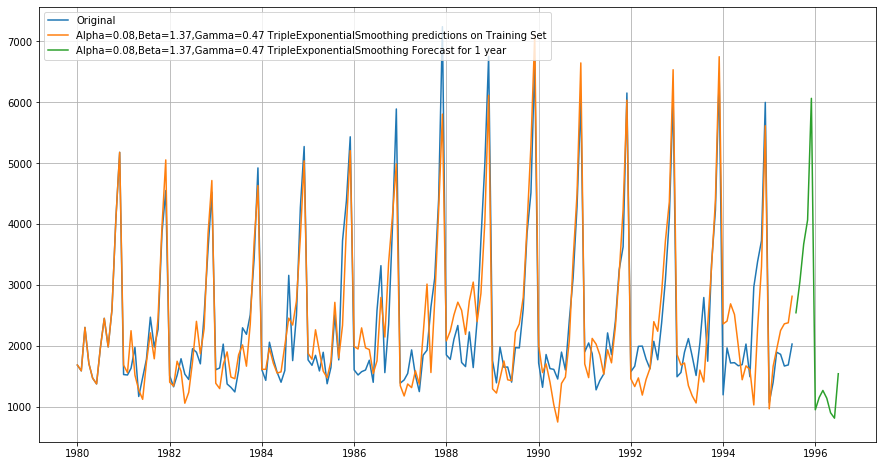

In [304]:
## Plotting on both the Training and Test using autofit

plt.plot(data_sparkling['Sparkling'], label='Original')

plt.plot(sparkling_full_model_TES_autofit.fittedvalues, label='Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing predictions on Training Set')
plt.plot(sparkling_full_model_TES_autofit_forecast, label='Alpha=0.08,Beta=1.37,Gamma=0.47 TripleExponentialSmoothing Forecast for 1 year')


plt.legend(loc='best')
plt.grid();

Rose wines monthly sales - Forecasting for next 12 months

In [305]:
# Declaring an object which has been instantiated by the training data. We are setting the seasonality 
# to be multiplicative

rose_full_model_TES = ExponentialSmoothing(data_rose['Rose'],trend='additive',seasonal='multiplicative',freq='MS')


In [306]:
rose_full_model_TES_autofit = rose_full_model_TES.fit(optimized=True,
                                           smoothing_level=0.13,smoothing_slope=0.013,smoothing_seasonal=0.0)

C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Rashmi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [307]:
rose_full_model_TES_autofit.params

{'smoothing_level': 0.13,
 'smoothing_slope': 0.013,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 64.01238769120206,
 'initial_slope': 0.0,
 'initial_seasons': array([1.70895863, 1.93116184, 2.12199522, 1.90428117, 2.07596528,
        2.24457104, 2.51145919, 2.58566744, 2.43841993, 2.41220362,
        2.78745233, 3.82358027]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [308]:
rose_full_model_TES_autofit_forecast = rose_full_model_TES_autofit.forecast(steps=12)

In [309]:
rose_full_model_TES_autofit_forecast

1995-08-01    49.083266
1995-09-01    45.834045
1995-10-01    44.892101
1995-11-01    51.356593
1995-12-01    69.734454
1996-01-01    30.849768
1996-02-01    34.501341
1996-03-01    37.515564
1996-04-01    33.311926
1996-05-01    35.928669
1996-06-01    38.428772
1996-07-01    42.530453
Freq: MS, dtype: float64

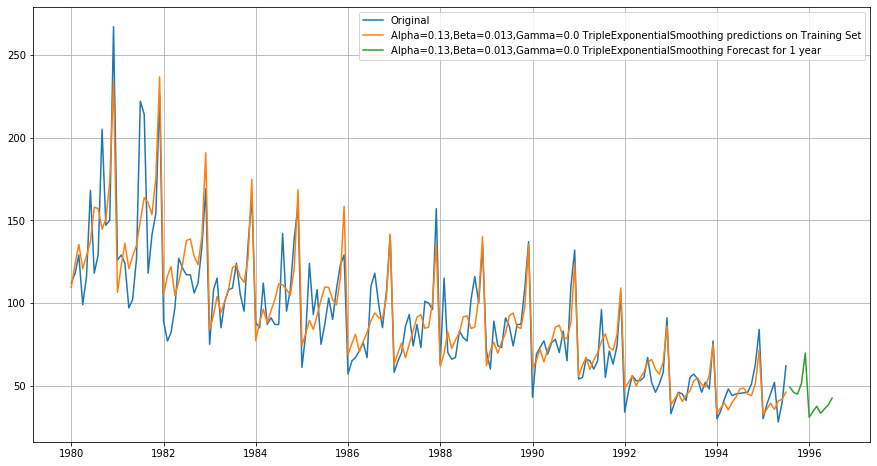

In [310]:
## Plotting on both the Training and Test using autofit

plt.plot(data_rose['Rose'], label='Original')

plt.plot(rose_full_model_TES_autofit.fittedvalues, label='Alpha=0.13,Beta=0.013,Gamma=0.0 TripleExponentialSmoothing predictions on Training Set')
plt.plot(rose_full_model_TES_autofit_forecast, label='Alpha=0.13,Beta=0.013,Gamma=0.0 TripleExponentialSmoothing Forecast for 1 year')


plt.legend(loc='best')
plt.grid();

# Q10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

# Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


In [311]:
sparkling_full_model_TES_autofit_forecast

1995-08-01    2544.944118
1995-09-01    3056.994695
1995-10-01    3671.176108
1995-11-01    4067.676234
1995-12-01    6065.410808
1996-01-01     951.584316
1996-02-01    1154.506470
1996-03-01    1268.900727
1996-04-01    1141.248609
1996-05-01     902.733156
1996-06-01     813.882011
1996-07-01    1543.713100
Freq: MS, dtype: float64

In [312]:
rose_full_model_TES_autofit_forecast

1995-08-01    49.083266
1995-09-01    45.834045
1995-10-01    44.892101
1995-11-01    51.356593
1995-12-01    69.734454
1996-01-01    30.849768
1996-02-01    34.501341
1996-03-01    37.515564
1996-04-01    33.311926
1996-05-01    35.928669
1996-06-01    38.428772
1996-07-01    42.530453
Freq: MS, dtype: float64

In [313]:
Sparkling_forecast = pd.DataFrame(sparkling_full_model_TES_autofit_forecast)
Sparkling_forecast.columns = ['Sparkling']
Sparkling_forecast 

Sparkling
1995-08-01  2544.944118
1995-09-01  3056.994695
1995-10-01  3671.176108
1995-11-01  4067.676234
1995-12-01  6065.410808
1996-01-01   951.584316
1996-02-01  1154.506470
1996-03-01  1268.900727
1996-04-01  1141.248609
1996-05-01   902.733156
1996-06-01   813.882011
1996-07-01  1543.713100

In [314]:
Rose_forecast = pd.DataFrame(rose_full_model_TES_autofit_forecast)
Rose_forecast.columns = ['Rose']
Rose_forecast 

Rose
1995-08-01  49.083266
1995-09-01  45.834045
1995-10-01  44.892101
1995-11-01  51.356593
1995-12-01  69.734454
1996-01-01  30.849768
1996-02-01  34.501341
1996-03-01  37.515564
1996-04-01  33.311926
1996-05-01  35.928669
1996-06-01  38.428772
1996-07-01  42.530453

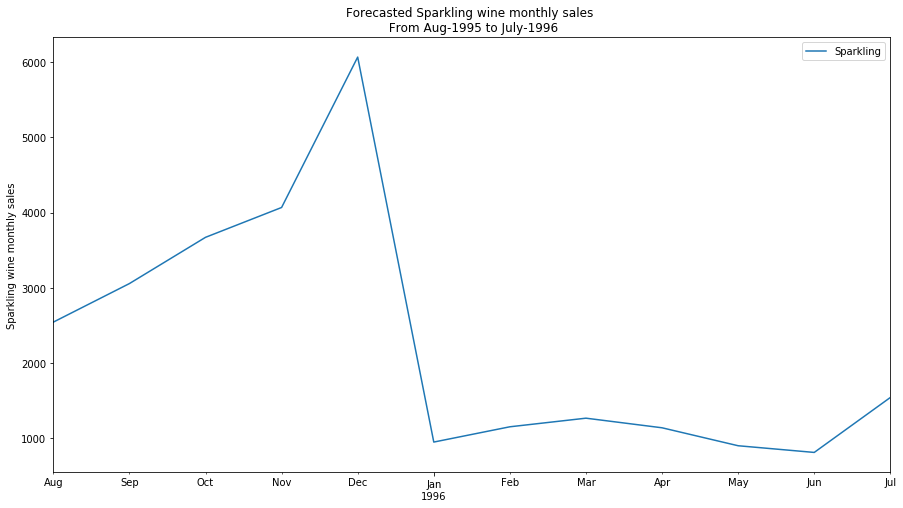

In [315]:
Sparkling_forecast.plot()
plt.ylabel('Sparkling wine monthly sales')
plt.title('Forecasted Sparkling wine monthly sales \n From Aug-1995 to July-1996')
plt.show()

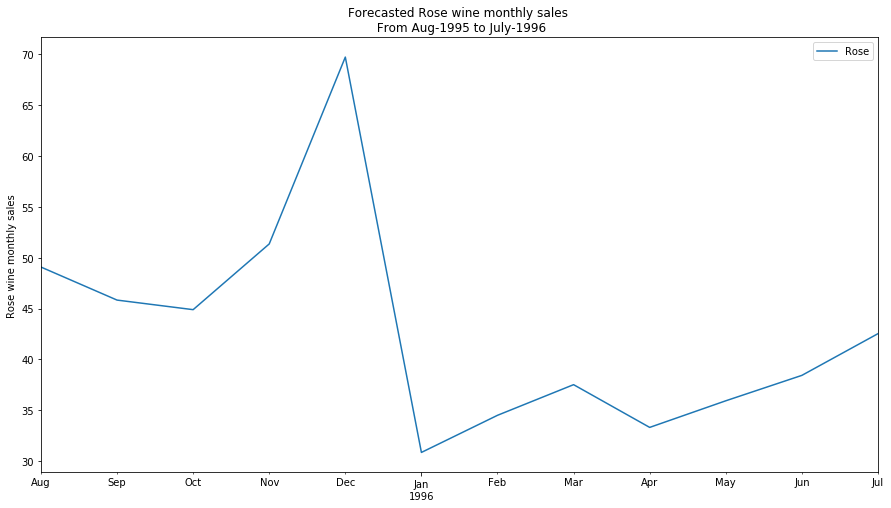

In [316]:
Rose_forecast.plot()
plt.ylabel('Rose wine monthly sales')
plt.title('Forecasted Rose wine monthly sales \n From Aug-1995 to July-1996')
plt.show()

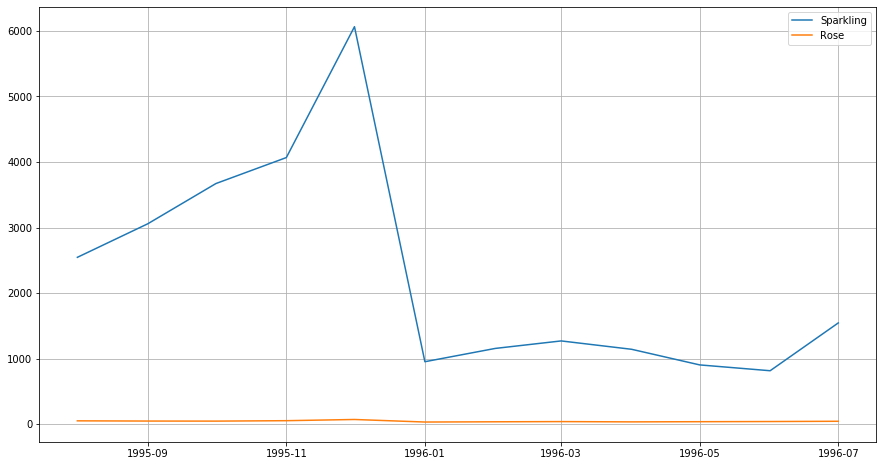

In [317]:
## Plotting on both the Sparkling and Rose forecasted monthly sales for a year

plt.plot(Sparkling_forecast['Sparkling'], label='Sparkling')
plt.plot(Rose_forecast['Rose'], label='Rose')

plt.legend(loc='best')
plt.grid();